# Testing Probability Distribution Ideas for Dublin Bus App

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
from statistics import variance
import joblib

### First Idea

In [2]:
actual = [33, 23, 20, 16, 19, 27, 48, 13, 30, 29, 50, 19]
predicted = [34, 20, 21, 13, 23, 24, 47, 14, 28, 29, 55, 22]

In [3]:
diffs = []
for i in range(12):
    diffs += [predicted[i] - actual[i]]

In [4]:
print(diffs)

[1, -3, 1, -3, 4, -3, -1, 1, -2, 0, 5, 3]


In [5]:
ndiffs = []
for i in range(12):
    ndiffs += [diffs[i] / actual[i]]

In [6]:
print(ndiffs)

[0.030303030303030304, -0.13043478260869565, 0.05, -0.1875, 0.21052631578947367, -0.1111111111111111, -0.020833333333333332, 0.07692307692307693, -0.06666666666666667, 0.0, 0.1, 0.15789473684210525]


In [7]:
for i in ndiffs:
    print(30*i)

0.9090909090909092
-3.9130434782608696
1.5
-5.625
6.315789473684211
-3.333333333333333
-0.625
2.307692307692308
-2.0
0.0
3.0
4.7368421052631575


In [8]:
bins = [-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3]
bin_indices = np.digitize(ndiffs, bins)
print(bin_indices)

[4 2 4 2 6 2 3 4 3 4 5 5]


In [9]:
plt.hist(ndiffs, bins)

(array([0., 3., 2., 4., 2., 1.]),
 array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3]),
 <BarContainer object of 6 artists>)

In [10]:
diffs35 = []
for i in range(12):
    diffs35 += [ndiffs[i] * 35 + 35]

In [11]:
bins35 = []
for j in bins:
    bins35 += [j * 35 + 35]

In [12]:
plt.hist(diffs35, bins35)

(array([0., 3., 2., 4., 2., 1.]),
 array([24.5, 28. , 31.5, 35. , 38.5, 42. , 45.5]),
 <BarContainer object of 6 artists>)

### Second Idea

In [13]:
actual2 = [32, 20, 30, 21, 17, 46, 29, 26, 38, 47, 27, 19]
predicted2 = [33, 18, 30, 21, 16, 49, 27, 27, 35, 49, 27, 20]

In [14]:
perc_error = []
for i in range(12):
    perc_error += [(actual2[i] - predicted2[i]) / actual2[i]]

In [15]:
print(perc_error)

[-0.03125, 0.1, 0.0, 0.0, 0.058823529411764705, -0.06521739130434782, 0.06896551724137931, -0.038461538461538464, 0.07894736842105263, -0.0425531914893617, 0.0, -0.05263157894736842]


In [16]:
bins2 = [-0.14, -0.10, -0.06, -0.02, 0.02, 0.06, 0.10, 0.14]

In [17]:
plt.hist(perc_error, bins2)

(array([0., 1., 4., 3., 1., 2., 1.]),
 array([-0.14, -0.1 , -0.06, -0.02,  0.02,  0.06,  0.1 ,  0.14]),
 <BarContainer object of 7 artists>)

In [18]:
mape = 0
for i in range(12):
    mape += abs(perc_error[i])
mape /= 12

In [19]:
print(mape)

0.044737509606401084


In [20]:
mean = 0
x = np.linspace(mean - 3*mape, mean + 3*mape, 100)
plt.plot(x, stats.norm.pdf(x, mean, mape))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [21]:
# prediction of 40 mins, then the distribution becomes the following
mean2 = 40
x2 = np.linspace(mean2 - 3*40*mape, mean2 + 3*40*mape, 100)
plt.plot(x2, stats.norm.pdf(x2, mean2, 40*mape))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

The above graph indicates that it is very unlikely that the bus will arrive before 36 mins or after 44 mins. The predicted time is 40 mins, but the probabilistic distribution accounts for variance in these predictions.

In [22]:
# plotting a gamma distribution
mean3 = 0
x3 = np.linspace(0, 10, 100)
plt.plot(x3, stats.gamma.pdf(x3, a=8, scale=0.333))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

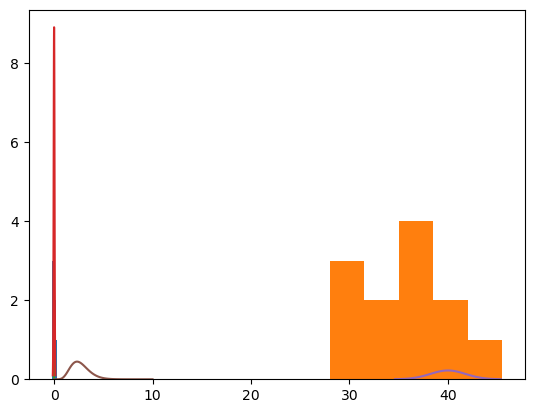

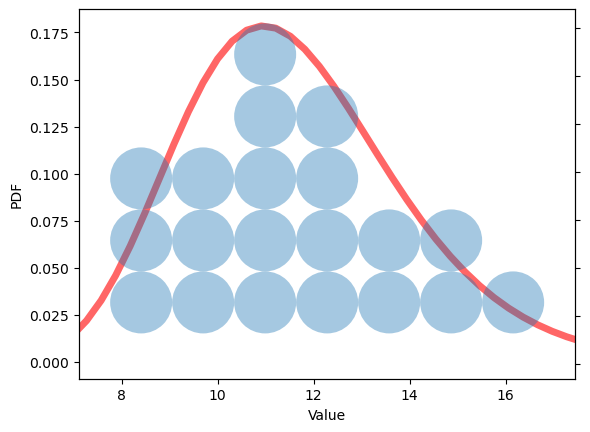

In [23]:
# some code from https://gist.github.com/tupui/c8dd181fd1e732584bbd7109b96177e3 showing the implementation of quantile plots

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import lognorm

# Parameters
sample = 20
n_bins = 7

# arguments for lognorm function
args = {'s': 0.2, 'scale': 11.4}


# data is lognormal continuous random variable with random variates
data = lognorm.rvs(size=10000, **args)



# probability density function
pdf = lognorm.pdf

# Evenly sample the CDF and do the inverse transformation (quantile function) to have x.
# probability of drawing a value less than x (i.e. P(X < x)) and the corresponding
# value of x to achieve that probability on the underlying distribution
p_less_than_x = np.linspace(1 / sample / 2, 1 - (1 / sample / 2), sample)
x = np.percentile(data, p_less_than_x * 100)  # Inverce CDF (ppf)

# Create bins
hist = np.histogram(x, bins=n_bins)
bins, edges = hist
radius = (edges[1] - edges[0]) / 2

# Plot
fig, ax = plt.subplots()

# Real PDF
x_ = np.linspace(0, 30, 100)
ax.plot(x_, pdf(x_, **args), 'r-', lw=5, alpha=0.6, label='lognorm pdf')
ax.set_ylabel('PDF')
ax.set_xlabel('Value')

# Dotplot
ax2 = ax.twinx()
patches = []
max_y = 0
for i in range(n_bins):
    x_bin = (edges[i + 1] + edges[i]) / 2
    y_bins = [(i + 1) * (radius * 2) for i in range(bins[i])]

    max_y = max(y_bins) if max(y_bins) > max_y else max_y

    for _, y_bin in enumerate(y_bins):
        circle = Circle((x_bin, y_bin), radius)
        patches.append(circle)

p = PatchCollection(patches, alpha=0.4)
ax2.add_collection(p)

# Axis tweek
y_scale = (max_y + radius) / max(pdf(x, **args))
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / y_scale))
ax2.yaxis.set_major_formatter(ticks_y)
ax2.set_yticklabels([])
ax2.set_xlim([min(x) - radius, max(x) + radius])
ax2.set_ylim([0, max_y + radius])
ax2.set_aspect(1)

plt.show()

In [24]:
print(data)

[10.07532247  6.90279409  9.10686361 ... 10.93002937 10.56606384
 11.22047092]


In [25]:
x4 = np.linspace(0, 5, 100)

y1 = stats.skewnorm.pdf(x4, 1, 3, 5) 
y2 = stats.skewnorm.pdf(x4, 1, 4, 4) 
plt.plot(x4, y1, "*", x4, y2, "r--")

# Using our KNN Models

See probabilistic estimates document and the code above (how they generated the quantile dot plots for when(ish) is my bus).

In [26]:
# loading in route 1 data (save it first in cell 150 or so in Travel Time Models)
dfroute1 = pd.read_csv("route1-leavetimes-cleaned2.csv", parse_dates=[0], infer_datetime_format=True)

In [27]:
dfroute1.head()

DAYOFSERVICE   TRIPID  PROGRNUMBER  STOPPOINTID  PLANNEDTIME_ARR  \
0   2018-01-01  5972116           12          119            48030   
1   2018-01-01  5972116           13           44            48079   
2   2018-01-01  5972116           14         7603            48114   
3   2018-01-01  5972116           15           45            48155   
4   2018-01-01  5972116           16           46            48221   

   PLANNEDTIME_DEP  ACTUALTIME_ARR  ACTUALTIME_DEP  VEHICLEID  DIRECTION  ...  \
0            48030           48012           48012    2693211          1  ...   
1            48079           48058           48058    2693211          1  ...   
2            48114           48071           48071    2693211          1  ...   
3            48155           48089           48100    2693211          1  ...   
4            48221           48137           48137    2693211          1  ...   

   HOUROFDAY  temp  wind_speed  w_main_Clouds  w_main_Drizzle  w_main_Fog  \
0         13  7.43       12.86              0               0           0   
1         13  7.43       12.86              0               0           0   
2         13  7.43       12.86              0               0           0   
3         13  7.43       12.86              0               0           0   
4         13  7.43       12.86              0               0           0   

   w_main_Mist  w_main_Rain  w_main_Smoke  w_main_Snow  
0            0            1             0            0  
1            0            1             0            0  
2            0            1             0            0  
3            0            1             0            0  
4            0            1             0            0  

[5 rows x 25 columns]

In [28]:
# 70/30 train/test split for route 1 data
trainroute1 = dfroute1.sample(frac=0.7, random_state=1)
testroute1 = dfroute1.drop(trainroute1.index)

Main issue with doing this is that the predictions we get largely depend on the progress number, which makes them extremely variant. Another issue is that most of our predictions will be one prediction minus another instead of just using the model once. We could therefore keep the difference between the progress numbers the same and measure the mean and standard deviation that way instead. This method introduces n - 1 different means and standard deviations for each route, where n is the number of stops in the route.

In [29]:
# need standard deviation and mean predictions for route 1 model
stdev = variance(trainroute1['TRAVELTIME'].loc[trainroute1['PROGRNUMBER'] == 2].to_list())**0.5

In [30]:
# mean travel time for progress number 2
mean = trainroute1['TRAVELTIME'].loc[trainroute1['PROGRNUMBER'] == 2].mean()

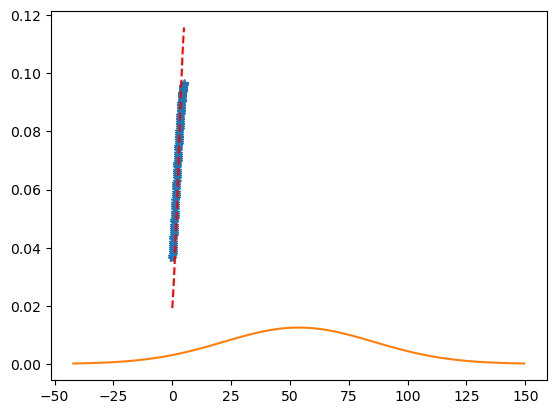

In [31]:
# plotting a normal distribution with mean and standard dev from above
x1 = np.linspace(mean - 3*stdev, mean + 3*stdev, 100)
plt.plot(x1, stats.norm.pdf(x1, mean, stdev))
plt.show()

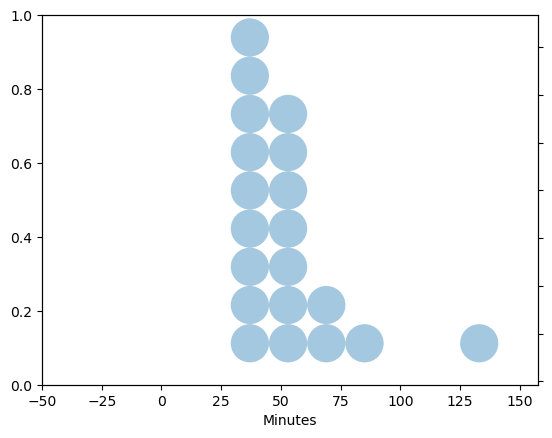

In [32]:
# generate draws using inverse CDF
sample1 = 20
p_less_than_x1 = np.linspace(1 / sample1 / 2, 1 - (1 / sample1 / 2), sample1)
x2 = np.percentile(trainroute1['TRAVELTIME'].loc[trainroute1['PROGRNUMBER'] == 2].to_list(), p_less_than_x1 * 100)  # Inverce CDF (ppf)

# Create bins
n_bins1 = 7
hist1 = np.histogram(x2, bins=n_bins1)
bins1, edges1 = hist1
radius1 = (edges1[1] - edges1[0]) / 2

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Minutes')

# Dotplot
ax21 = ax1.twinx()
patches1 = []
max_y1 = 0
for i in range(n_bins1):
    x_bin1 = (edges1[i + 1] + edges1[i]) / 2
    y_bins1 = [(i + 1) * (radius1 * 2) for i in range(bins1[i])]
    
    # if y_bins1 is empty, continue
    if not y_bins1:
        continue

    max_y1 = max(y_bins1) if max(y_bins1) > max_y1 else max_y1

    for _, y_bin1 in enumerate(y_bins1):
        circle1 = Circle((x_bin1, y_bin1), radius1)
        patches1.append(circle1)
        
p1 = PatchCollection(patches1, alpha=0.4)
ax21.add_collection(p1)

# Axis tweek
y_scale1 = (max_y1 + radius1) / max(pdf(x1, **args))
ticks_y1 = ticker.FuncFormatter(lambda x1, pos: '{0:g}'.format(x1 / y_scale1))
ax21.yaxis.set_major_formatter(ticks_y1)
ax21.set_yticklabels([])
ax21.set_xlim([min(x1) - radius1, max(x1) + radius1])
ax21.set_ylim([0, max_y1 + radius1])
ax21.set_aspect(1)

plt.show()

## Input Data coming from Predicted - Actual Travel Time

In [33]:
# loading knn model from joblib file
fn = "KNNJoblibFiles/knn_1.joblib"
with open(fn, 'rb') as knnfile:
    knnmodel = joblib.load(knnfile)

In [34]:
# predicting for route 1 test dataframe
knntestpred = knnmodel.predict(testroute1[['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'HOUROFDAY']])

In [35]:
act_pred_knn = pd.concat([testroute1['TRAVELTIME'], pd.DataFrame(knntestpred, columns=['Predicted'], index=testroute1['TRAVELTIME'].index)], axis=1)

In [36]:
act_pred_knn.head()

TRAVELTIME Predicted
1        631.0     611.2
6        762.0     937.6
19      1883.0    2337.8
22      2039.0    2695.4
25         0.0      18.2

In [37]:
act_pred_knn['DIFF_DIV_ACT'] = (act_pred_knn['Predicted'] - act_pred_knn['TRAVELTIME']) / (act_pred_knn['TRAVELTIME'] + 1.0)

In [38]:
act_pred_knn.head(50)

TRAVELTIME Predicted DIFF_DIV_ACT
1         631.0     611.2    -0.031329
6         762.0     937.6     0.230144
19       1883.0    2337.8     0.241401
22       2039.0    2695.4     0.321765
25          0.0      18.2         18.2
30        406.0     418.4     0.030467
38        880.0    1106.8     0.257435
40       1955.0    2347.0     0.200409
41       2153.0    2733.8     0.269638
43       1861.0    1931.6     0.037916
54       2593.0    2643.4     0.019429
58       2735.0    2922.6     0.068567
69        968.0    1243.4     0.284211
71       1268.0    1809.2     0.426478
72       1433.0    1931.6     0.347699
74       1524.0    2054.6     0.347934
76         33.0      44.0     0.323529
78        109.0     132.0     0.209091
80        192.0     213.8     0.112953
82        330.0     418.4     0.267069
83        387.0     454.4     0.173711
85        443.0     510.2     0.151351
87       1347.0    2022.6     0.501187
91        813.0     972.0     0.195332
93       1019.0    1106.8     0.086078
100      1958.0    2139.0     0.092394
105      2376.0    2733.8     0.150526
107      2468.0    2922.6     0.184123
108       779.0     897.4     0.151795
113       649.0     677.6        0.044
115      1436.0    1809.2     0.259708
119         0.0      18.2         18.2
125       402.0     418.4     0.040695
127        35.0      44.0         0.25
131        63.0      28.8    -0.534375
134       269.0     333.2     0.237778
145      1077.0    1052.6    -0.022635
149      1814.0    2104.2      0.15989
150      2017.0    2030.2     0.006541
153      2135.0    2290.2     0.072659
154      2185.0    2211.0     0.011894
162      1616.0    1452.6    -0.101051
164      1772.0    2036.4     0.149126
166      2414.0    2430.8     0.006957
177      1722.0    2030.2     0.178874
183      1971.0    2694.8     0.367039
184      1990.0    2430.8     0.221396
189      2267.0    2789.0     0.230159
197       481.0     449.6    -0.065145
200       156.0     146.8    -0.058599

In [189]:
# function to plot quantile dot plot given the normalised data and model prediction

def quantile_dotplot(lineid, normdata, pred):
    
    sample = 20
    p_less_than_x = np.linspace(1 / sample / 2, 1 - (1 / sample / 2), sample)
    
    preddata = []
    for i in normdata:
        preddata += [i*pred + pred]
        
    stdev = variance(preddata)**0.5
    sum = 0
    for j in preddata:
        sum += j
    mean = sum / len(preddata)
    
    x2 = np.percentile(preddata, p_less_than_x * 100)  # Inverce CDF (ppf)

    # Create bins
    n_bins = 7
    hist = np.histogram(x2, bins=n_bins)
    bins, edges = hist
    radius = (edges[1] - edges[0]) / 2

    fig, ax = plt.subplots()
    ax.set_xlabel('Minutes')

    # Dotplot
    ax2 = ax.twinx()
    patches = []
    max_y = 0
    max_len = 0
    for i in range(n_bins):
        x_bin = (edges[i + 1] + edges[i]) / 2
        y_bins = [(i + 1) * (radius * 2) for i in range(bins[i])]
    
        # if y_bins is empty, continue
        if not y_bins:
            continue
            
        if len(y_bins) > max_len:
            max_len = len(y_bins)

        max_y = max(y_bins) if max(y_bins) > max_y else max_y

        for _, y_bin in enumerate(y_bins):
            circle = Circle((x_bin, y_bin), radius)
            patches.append(circle)
            
    
    p = PatchCollection(patches, alpha=0.4)
    p.set_facecolor('royalblue')
    ax2.add_collection(p)
    
    scale_dict = {
        '68':1.6,
        '45A':1.4,
        '25A':1.5,
        '14':1.7,
        '77A':1.25,
        '39':1.4,
        '16':1.2,
        '40D':1.2,
        '27B':1.35,
        '142':1.1,
        '83':1.3,
        '130':1,
        '15':1.6,
        '46A':1.3,
        '33':1.4,
        '7':1.5,
        '39A':1.5,
        '1':1.3,
        '41':1.2,
        '67X':1.1,
        '59':1.3,
        '9':1.5,
        '40':1.6,
        '239':1.6,
        '84':1.1,
        '53':1.1,
        '185':0.7,
        '151':1.3,
        '13':1.35,
        '15B':1.3,
        '65B':1.1,
        '29A':1.6,
        '61':1,
        '140':7.2,
        '123':1.3,
        '79A':1,
        '38A':1.5,
        '31':1,
        '69':1.35,
        '44':1.6,
        '42':2.2,
        '67':1.3,
        '184':1.4,
        '238':1,
        '145':1.45,
        '17A':1.6,
        '32':1.5,
        '27A':1.3,
        '17':1.4,
        '27X':1.5,
        '122':1.45,
        '54A':1.3,
        '66':1.6,
        '150':1.2,
        '56A':1.3,
        '37':1.5,
        '27':1.6,
        '15A':1,
        '65':1.3,
        '47':1.6,
        '76':1.45,
        '79':1.15,
        '83A':1.4,
        '63':1.5,
        '33B':0.9,
        '4':1.35,
        '120':1.6,
        '41C':1.45,
        '70':1.2,
        '84A':1.5,
        '220':1.45,
        '32X':1.45,
        '68A':1,
        '84X':0.7,
        '38':1.35,
        '102':1.6,
        '270':1.4,
        '51X':1,
        '33X':1.6,
        '75':1.35,
        '26':1.5,
        '66A':1.3,
        '31A':1,
        '49':1.2,
        '111':0.8,
        '18':1.3,
        '11':1.5,
        '14C':1.4,
        '114':1.4,
        '76A':1.1,
        '44B':1.5,
        '7A':1.6,
        '43':1.3,
        '25':1.6,
        '104':1.6,
        '33A':1.1,
        '16C':1.3,
        '42D':1.1,
        '31B':0.8,
        '66X':1,
        '31D':1.6,
        '33D':1.6,
        '39X':1.7,
        '41B':1.45,
        '25B':1.2,
        '7D':1.4,
        '46E':1.6,
        '118':0.8,
        '51D':1.8,
        '15D':1.4,
        '41A':1.6,
        '25D':1.1,
        '38D':1.2,
        '40B':1.6,
        '66B':1.4,
        '38B':1.6,
        '236':0.7,
        '7B':1.45,
        '41X':0.8,
        '40E':1.4,
        '161':1,
        '70D':1.4,
        '69X':1.6,
        '116':1.6,
        '77X':1.6,
        '25X':1.6,
        '68X':1.5,
        '16D':1.4,
        '33E':1.5,
        '41D':2.3
    }
    
    scale = scale_dict[lineid]
   # scale = 1.6

    shift_dict = {
        '68':0.08,
        '45A':-0.1,
        '25A':-0.02,
        '14':0.06,
        '77A':-0.15,
        '39':0.05,
        '16':-0.15,
        '40D':-0.2,
        '27B':-0.1,
        '142':-0.22,
        '83':-0.05,
        '130':-0.35,
        '15':0,
        '46A':-0.05,
        '33':0.02,
        '7':0.02,
        '39A':0.02,
        '1':-0.2,
        '41':-0.1,
        '67X':-0.3,
        '59':-0.17,
        '9':0,
        '40':0,
        '239':0.05,
        '84':-0.15,
        '53':-0.12,
        '185':-0.45,
        '151':-0.07,
        '13':-0.07,
        '15B':0,
        '65B':-0.1,
        '29A':0.02,
        '61':-0.11,
        '140':0.57,
        '123':-0.06,
        '79A':-0.2,
        '38A':0,
        '31':0,
        '69':0.03,
        '44':-0.02,
        '42':0.22,
        '67':0,
        '184':-0.1,
        '238':-0.23,
        '145':-0.02,
        '17A':0.1,
        '32':0,
        '27A':-0.1,
        '17':0,
        '27X':-0.1,
        '122':0,
        '54A':-0.13,
        '66':0.02,
        '150':0,
        '56A':0,
        '37':0.05,
        '27':0,
        '15A':0,
        '65':0,
        '47':0.03,
        '76':0.05,
        '79':-0.1,
        '83A':-0.2,
        '63':0,
        '33B':0,
        '4':-0.03,
        '120':0,
        '41C':0.03,
        '70':-0.03,
        '84A':0.01,
        '220':-0.04,
        '32X':-0.08,
        '68A':-0.16,
        '84X':-0.7,
        '38':0,
        '102':0.1,
        '270':0.05,
        '51X':-0.23,
        '33X':0.06,
        '75':-0.1,
        '26':0,
        '66A':0,
        '31A':-0.25,
        '49':-0.1,
        '111':-0.4,
        '18':-0.1,
        '11':0,
        '14C':-0.18,
        '114':-0.16,
        '76A':-0.27,
        '44B':-0.1,
        '7A':0.05,
        '43':-0.15,
        '25':0.07,
        '104':0,
        '33A':-0.25,
        '16C':0,
        '42D':-0.15,
        '31B':-0.6,
        '66X':-0.3,
        '31D':0,
        '33D':0,
        '39X':0.03,
        '41B':0,
        '25B':-0.15,
        '7D':-0.1,
        '46E':0,
        '118':-0.65,
        '51D':0.02,
        '15D':-0.18,
        '41A':-0.04,
        '25D':-0.07,
        '38D':-0.22,
        '40B':0.1,
        '66B':-0.13,
        '38B':0,
        '236':-0.8,
        '7B':-0.03,
        '41X':-0.5,
        '40E':-0.12,
        '161':0,
        '70D':-0.1,
        '69X':-0.02,
        '116':0.07,
        '77X':-0.07,
        '25X':-0.02,
        '68X':-0.12,
        '16D':-0.15,
        '33E':-0.1,
        '41D':0.25
    }
    
    shift = shift_dict[lineid]
    
    x1 = np.linspace((mean - 3*stdev) / scale + 0.45*pred + shift*pred, (mean + 3*stdev) / scale + 0.45*pred + shift*pred, 100)

    # Axis tweek
    # arguments for lognorm function
    args = {'s': 0.2, 'scale': 11.4}
    y_scale = (max_y + radius) / max(pdf(x1, **args))
    ticks_y = ticker.FuncFormatter(lambda x1, pos: '{0:g}'.format(x1 / y_scale))
    ax2.yaxis.set_major_formatter(ticks_y)
    ax2.set_yticklabels([])
    ax2.set_xlim([min(x1) - radius, max(x1) + radius])
    ax2.set_ylim([0, max_y + radius])
    ax2.set_aspect(1)
    
    # turn off y ticks
    plt.yticks([])
    ax.yaxis.set_major_locator(plt.NullLocator())
    
    # adding more x ticks
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
    
    # adding vertical line for the mean
    plt.axvline(x=pred, color='r')

    plt.show()

In [39]:
# loading the trips data
dftrips = pd.read_csv("rt_trips_DB_2018-cleaned.csv", parse_dates=[0], infer_datetime_format=True)

In [44]:
linelist = dftrips['LINEID'].unique()

68


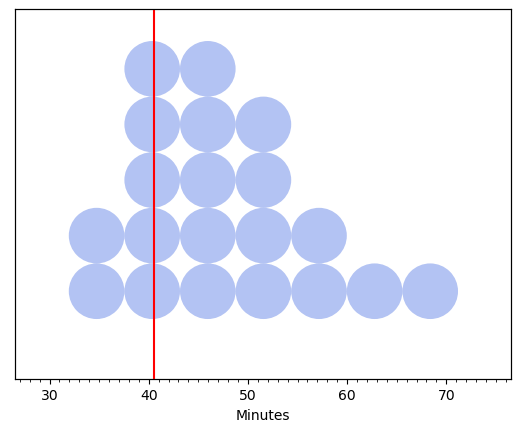

45A


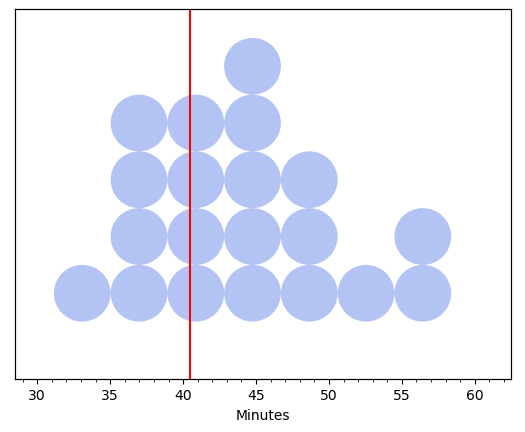

25A


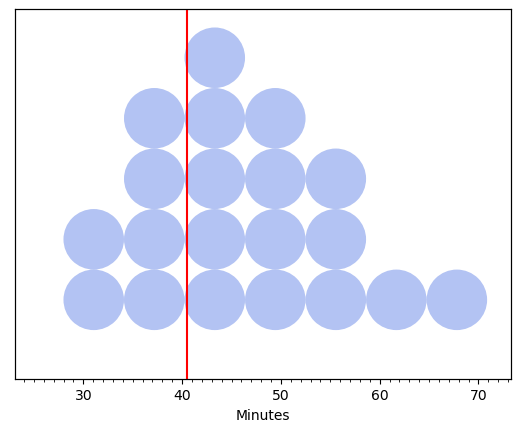

14


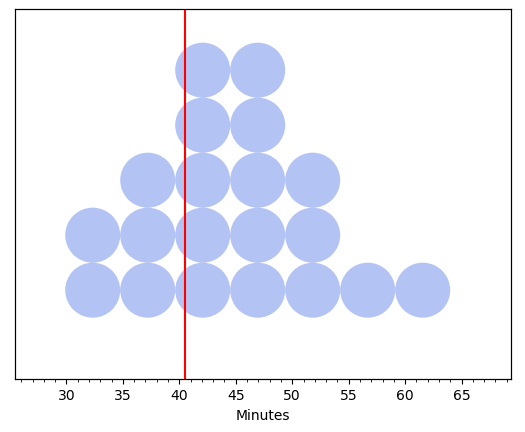

77A


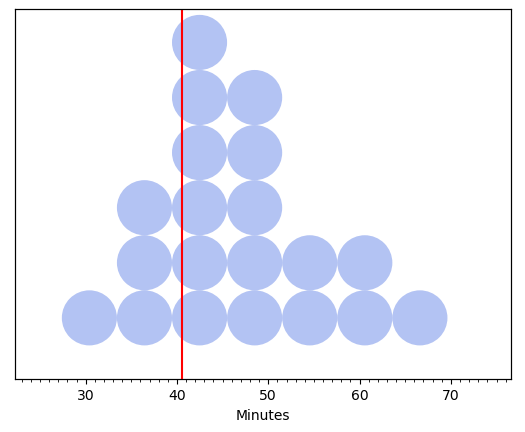

39


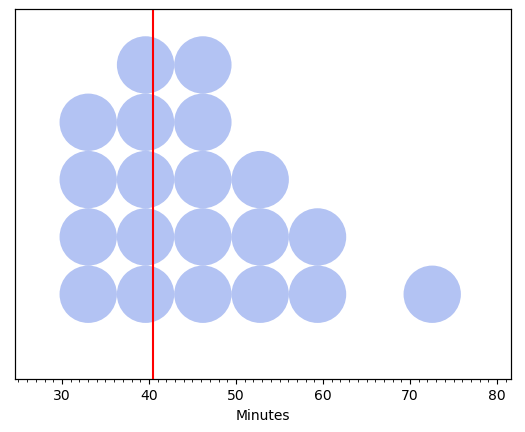

16


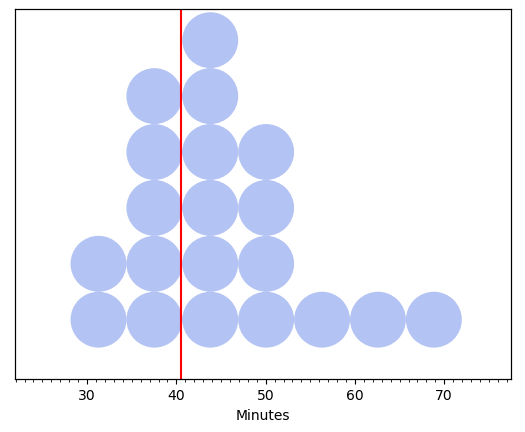

40D


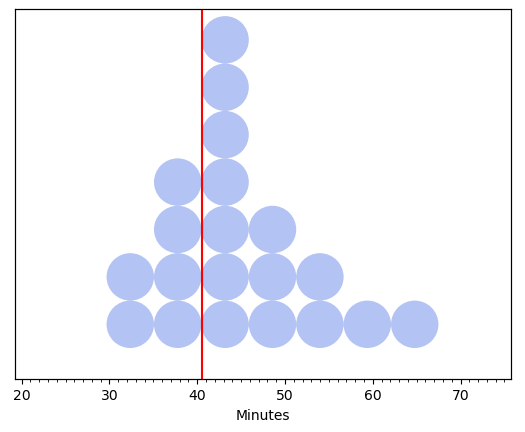

27B


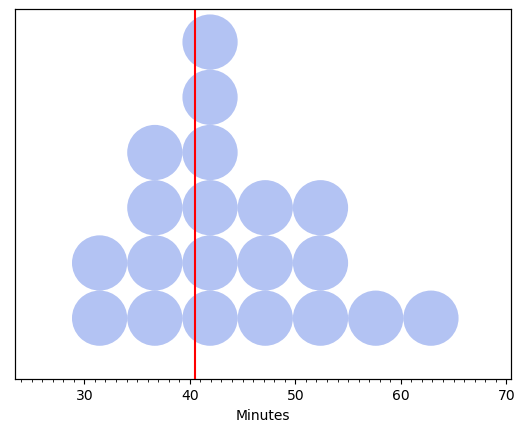

142


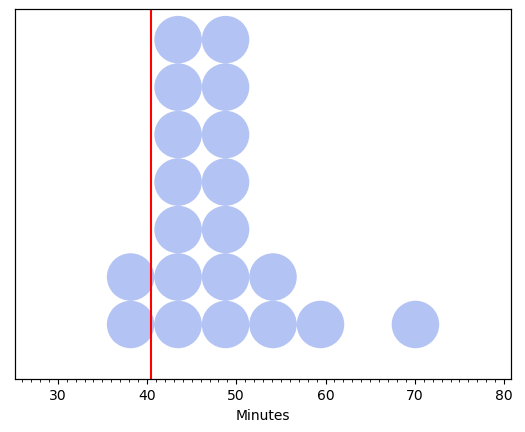

83


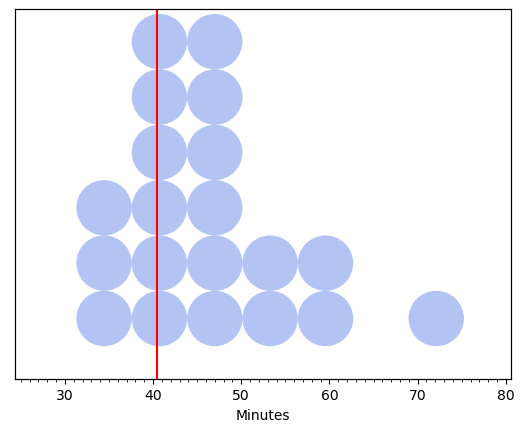

130


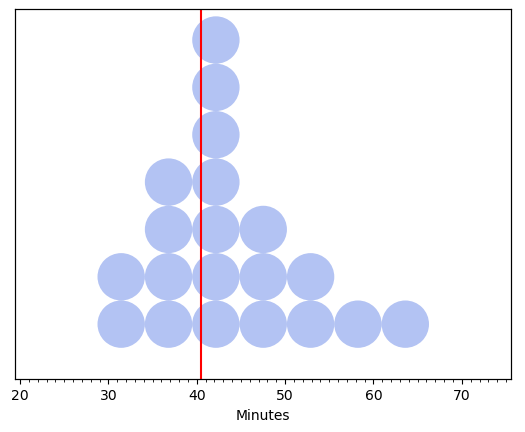

15


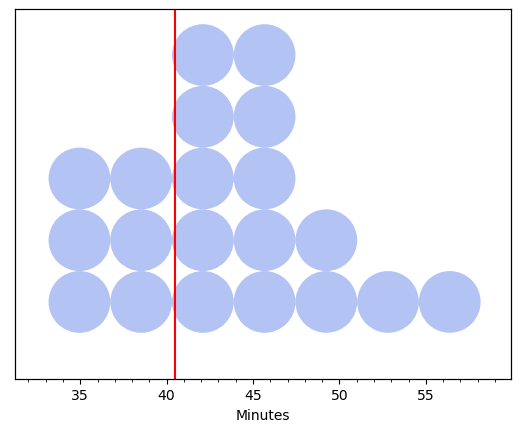

46A


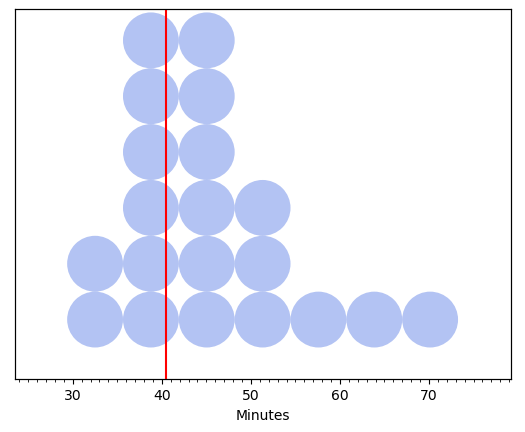

33


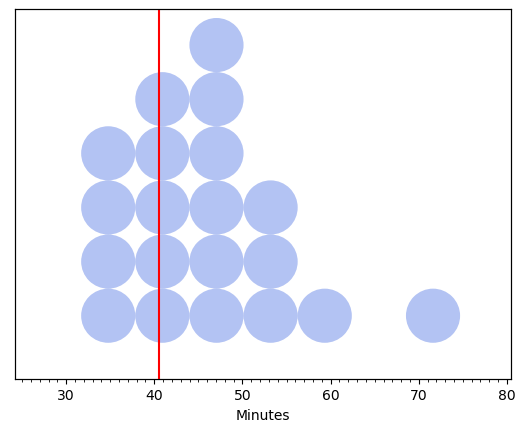

7


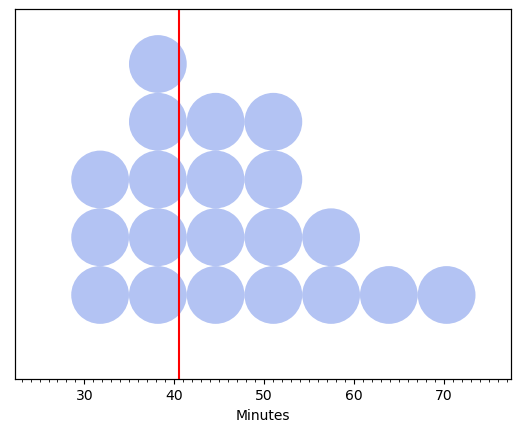

39A


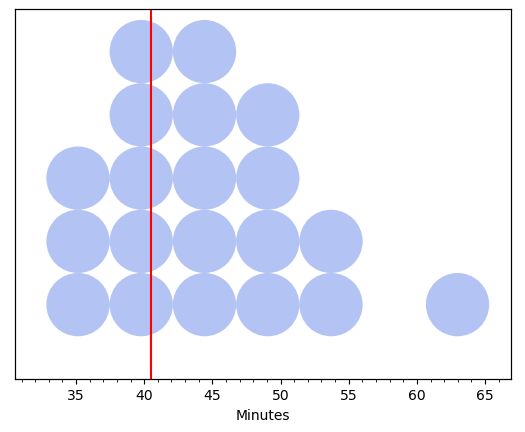

1


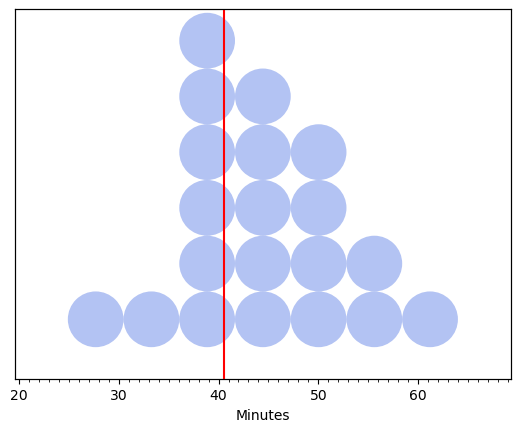

41


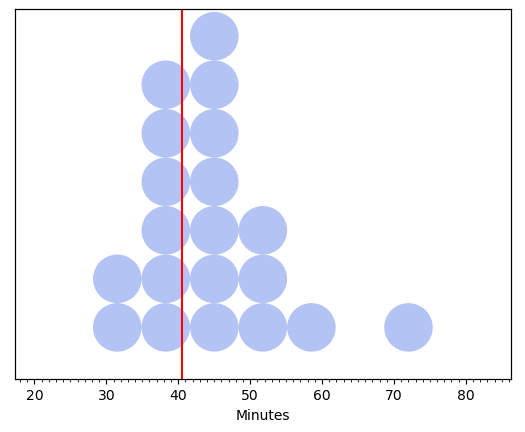

67X


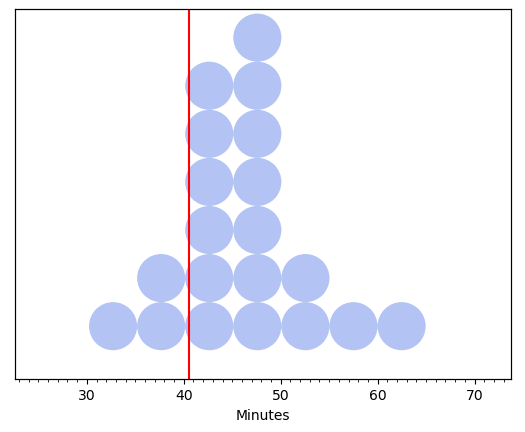

59


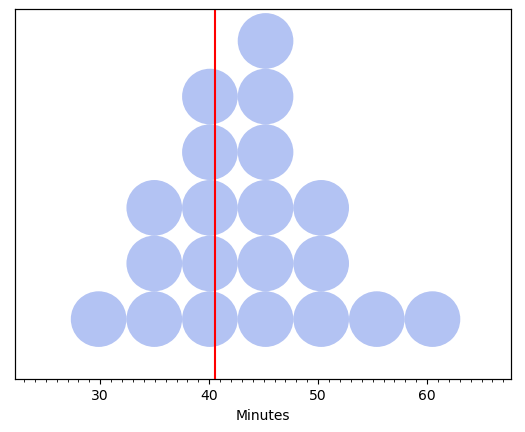

9


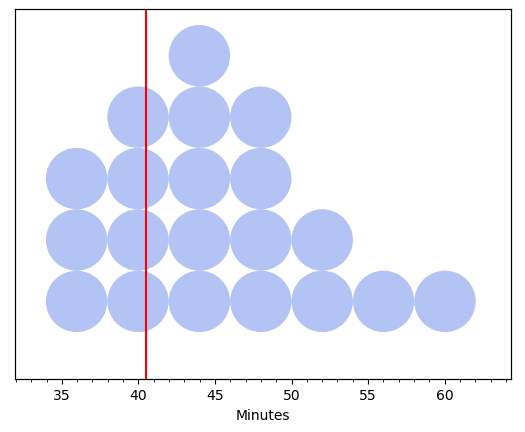

40


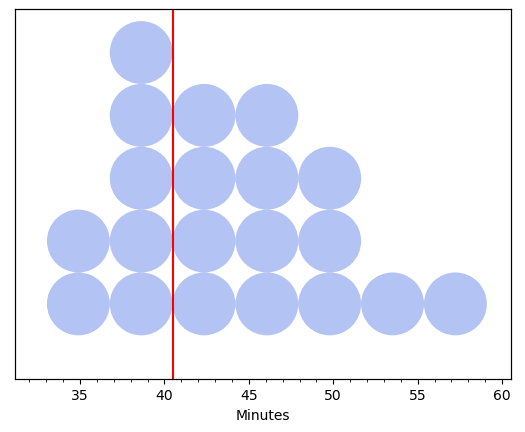

239


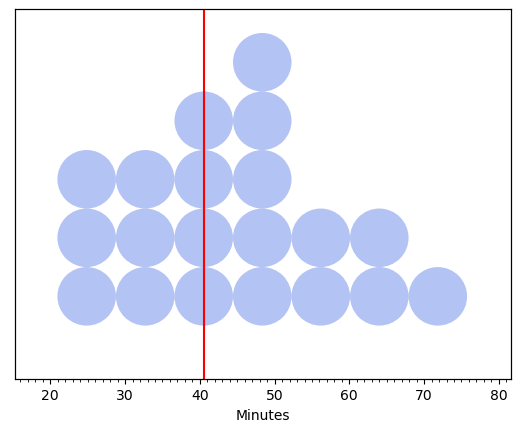

84


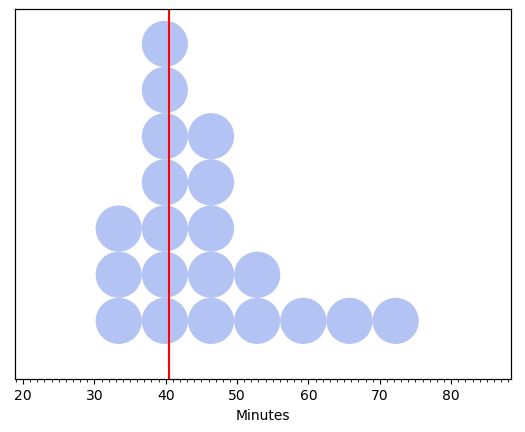

53


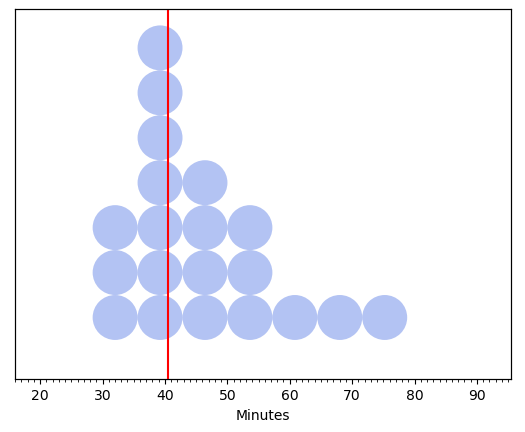

185


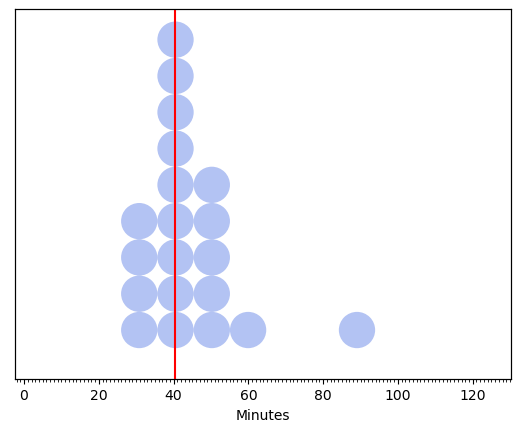

151


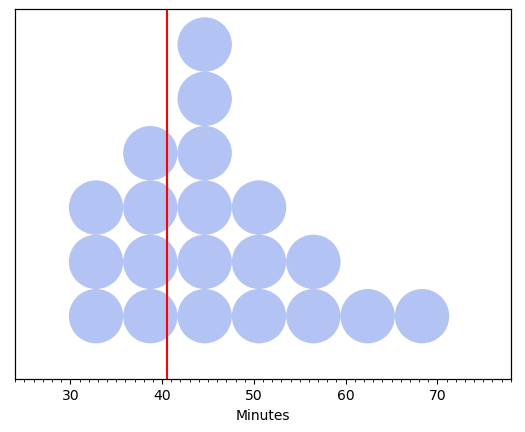

13


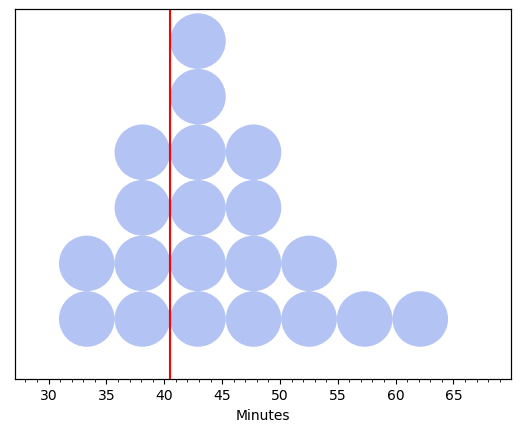

15B


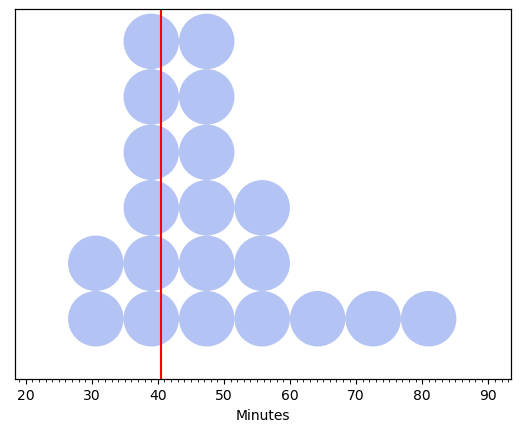

65B


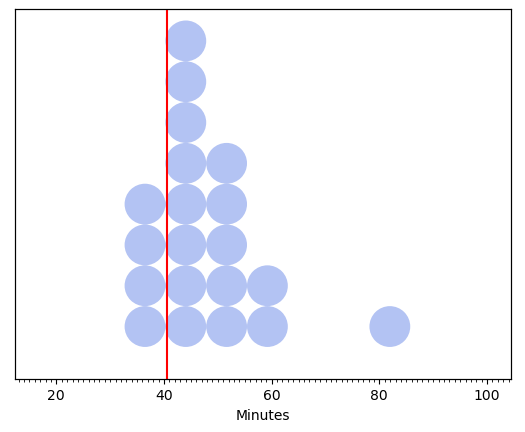

29A


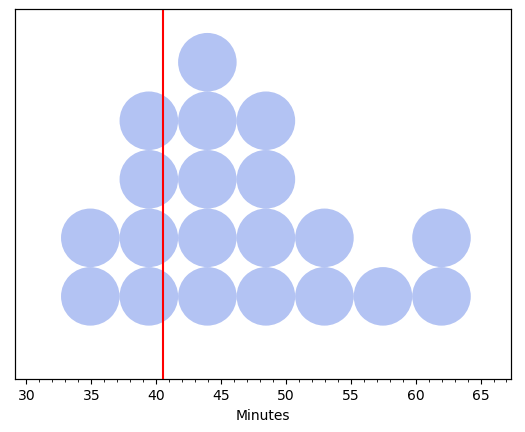

61


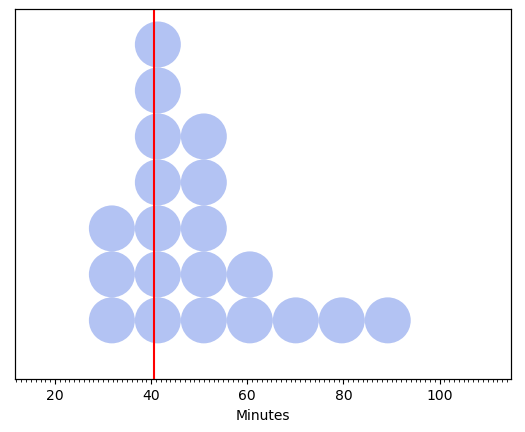

140


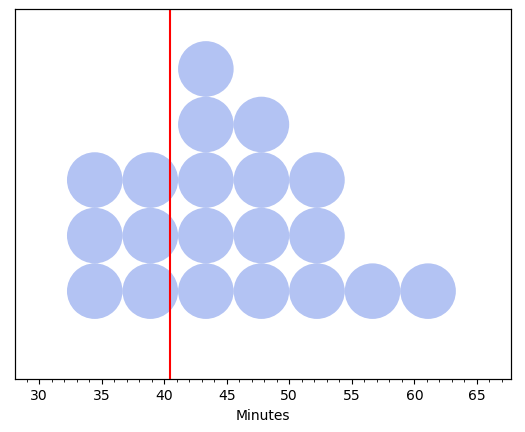

123


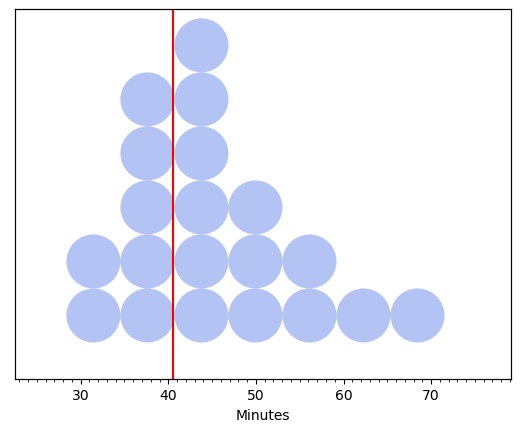

79A


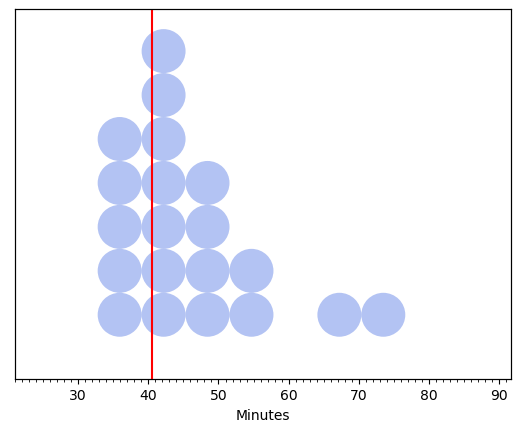

38A


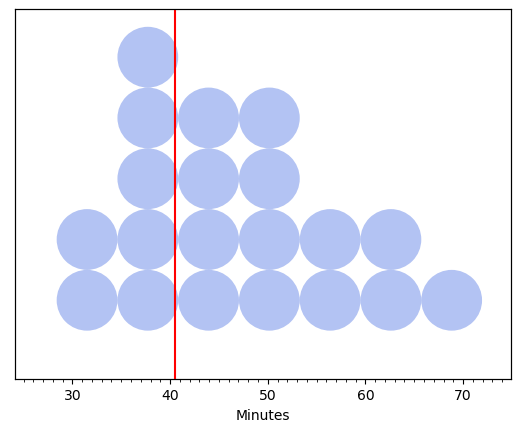

31


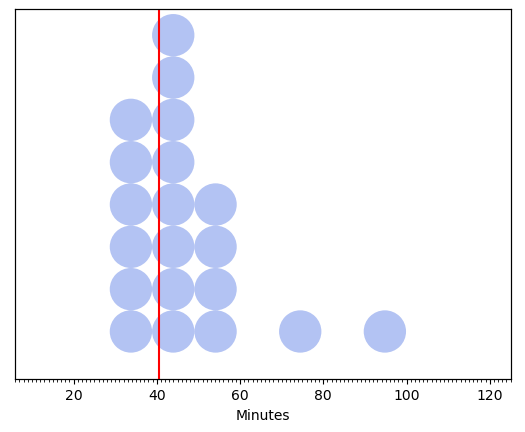

69


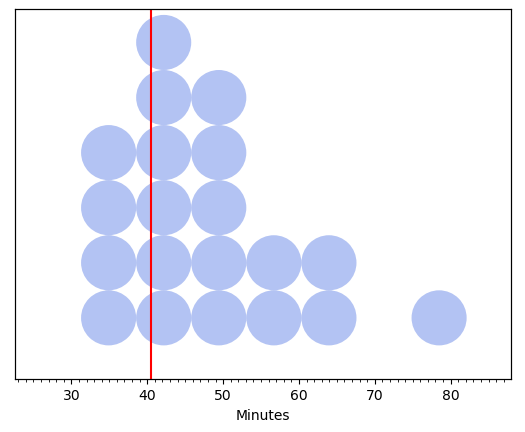

44


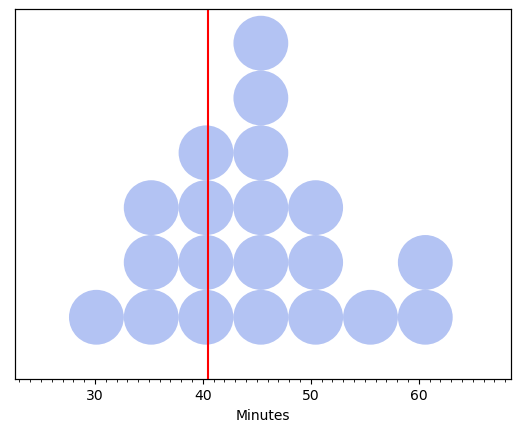

42


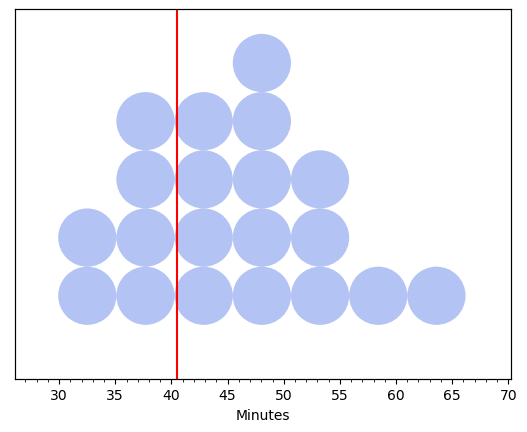

67


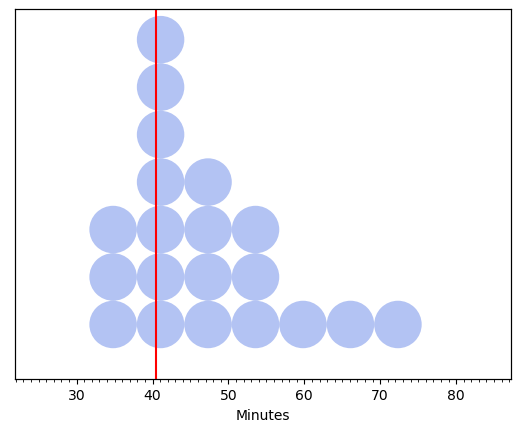

184


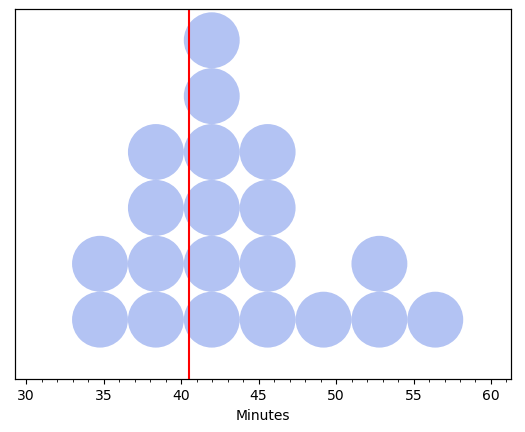

238


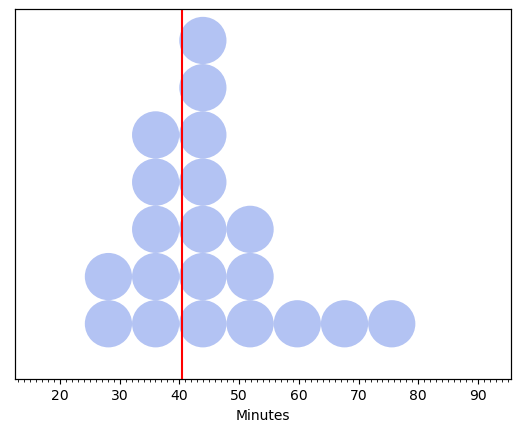

145


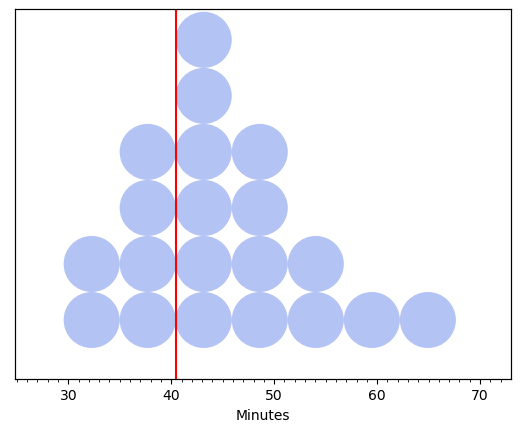

17A


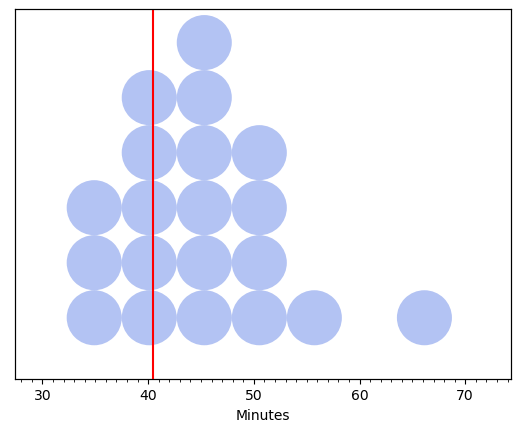

32


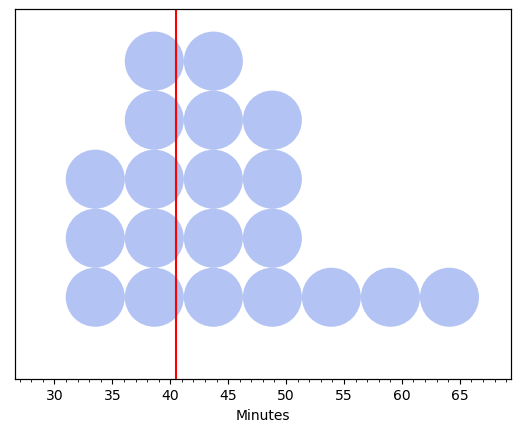

27A


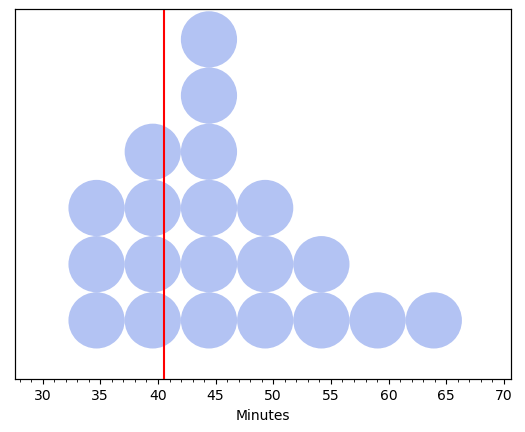

17


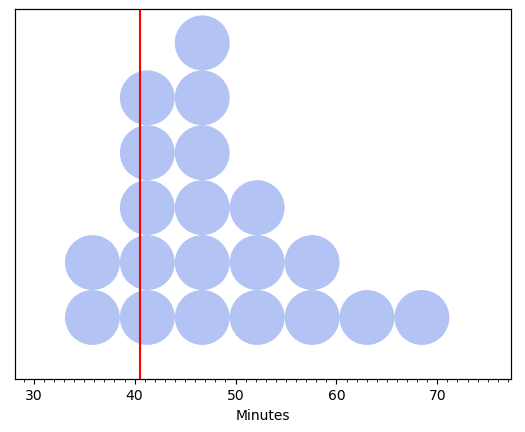

27X


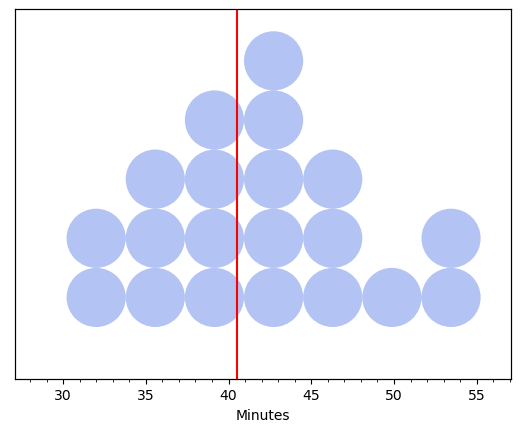

122


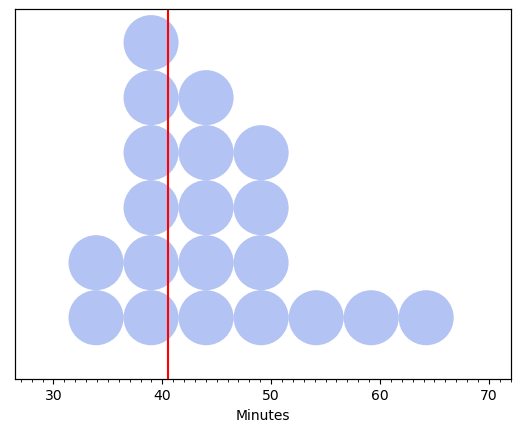

54A


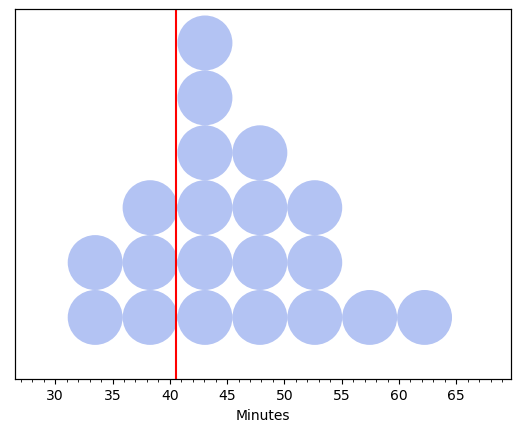

66


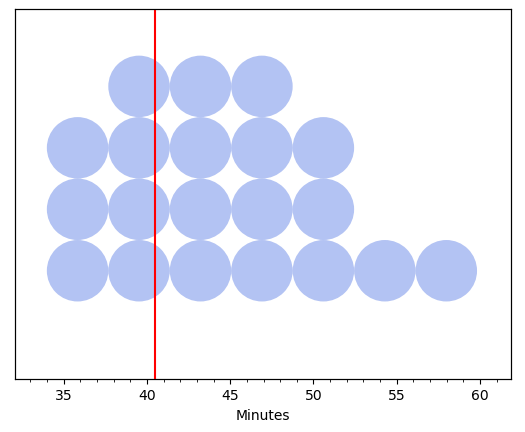

150


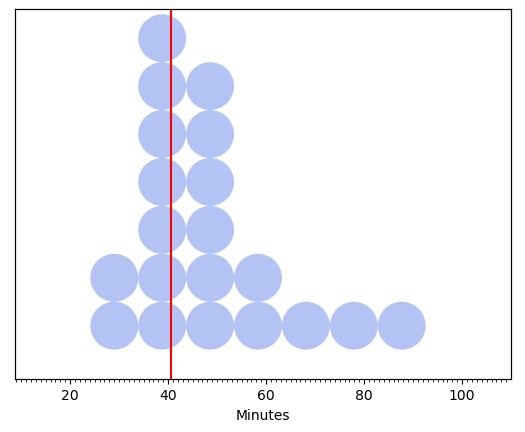

56A


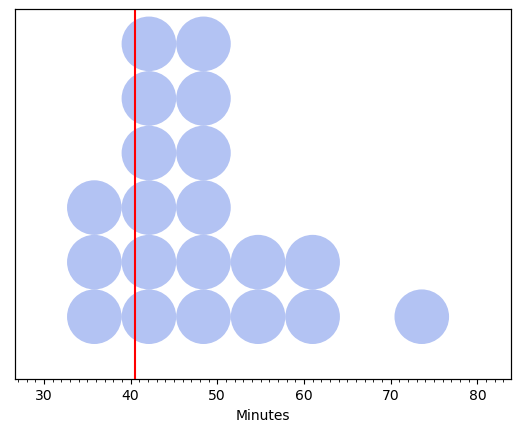

37


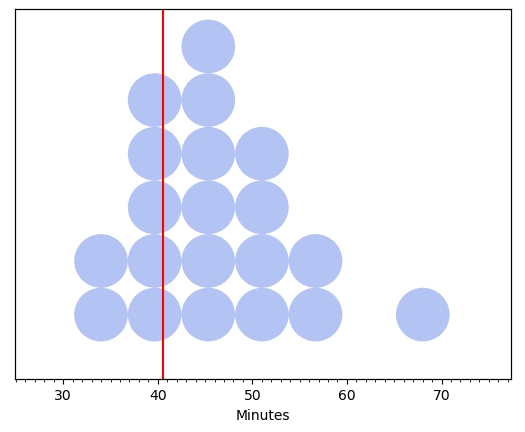

27


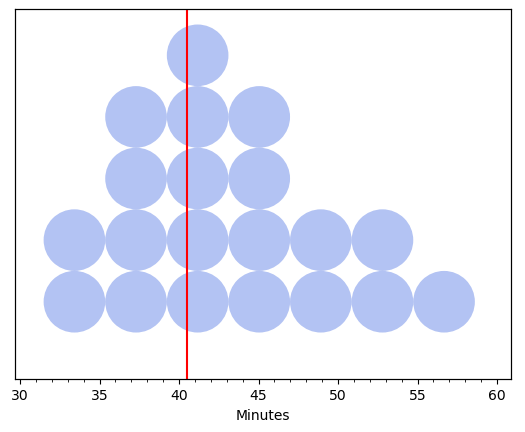

15A


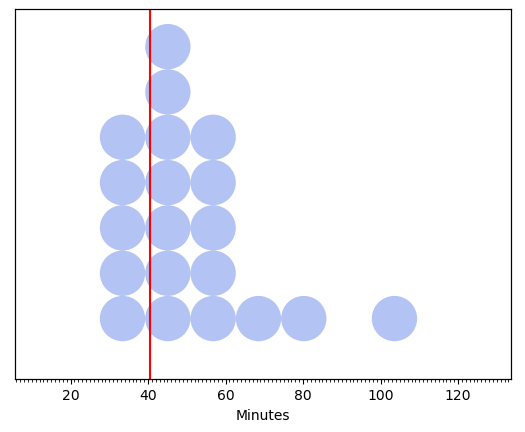

65


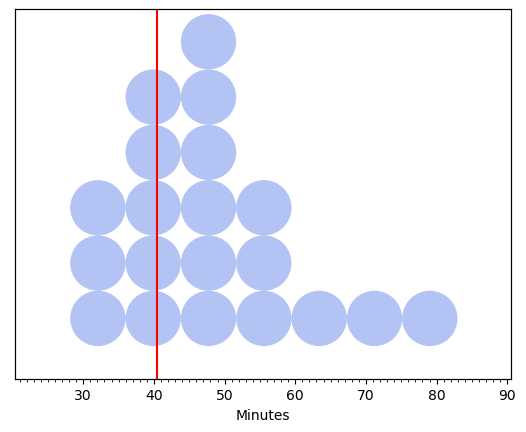

47


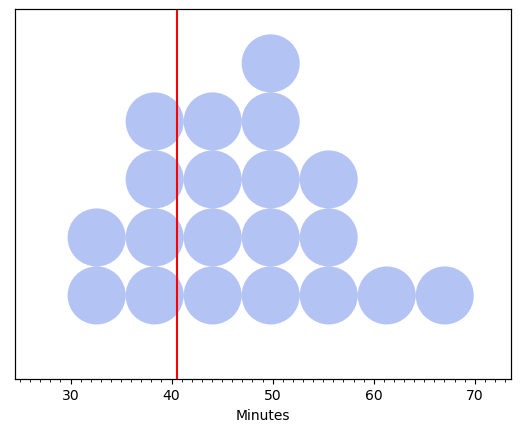

76


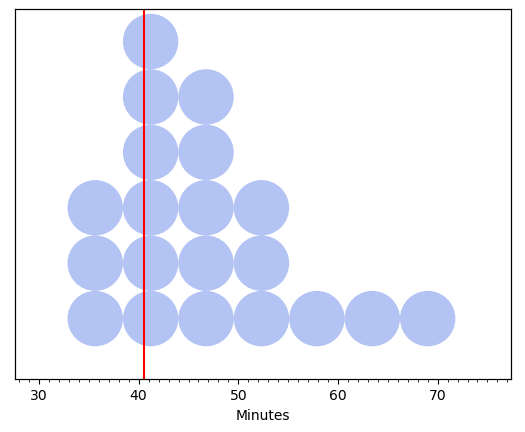

79


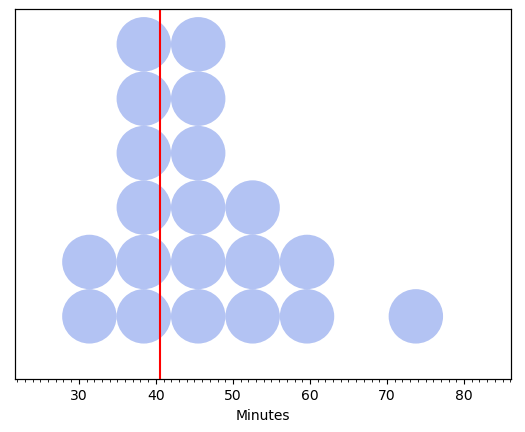

83A


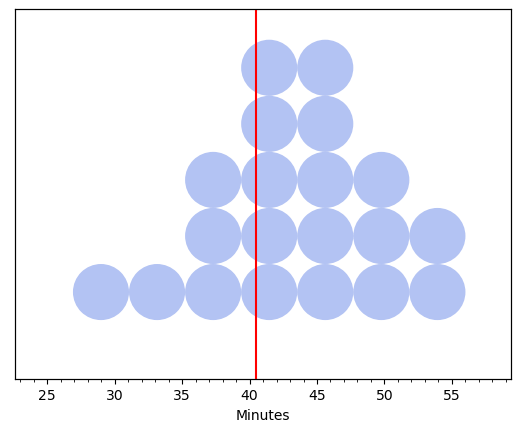

63


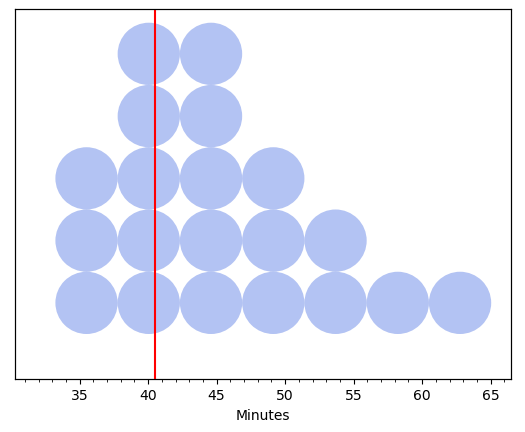

33B


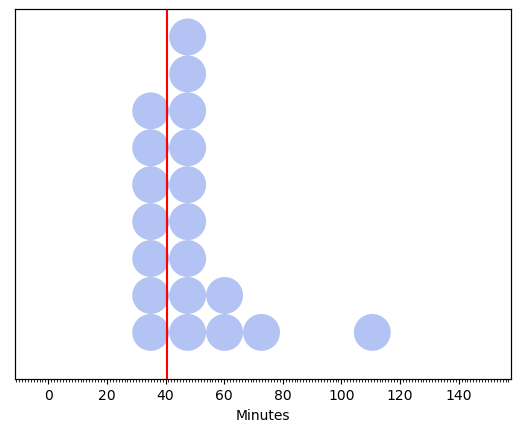

4


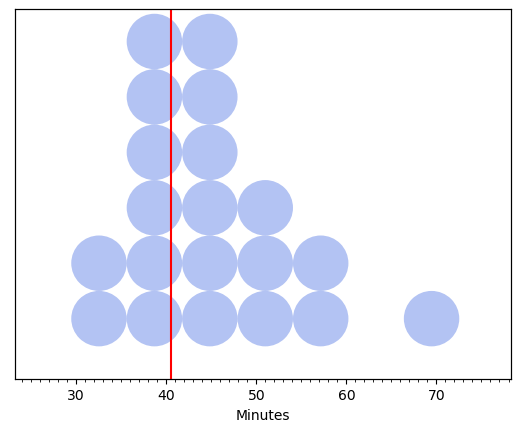

120


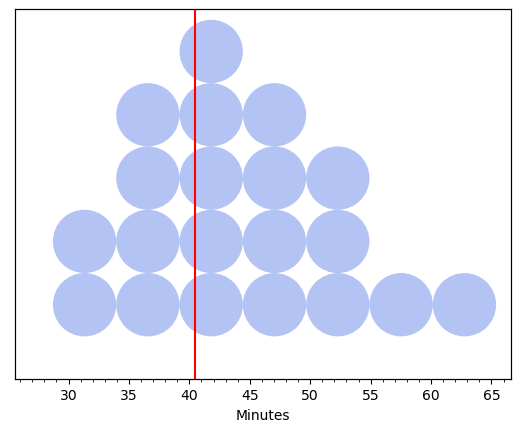

41C


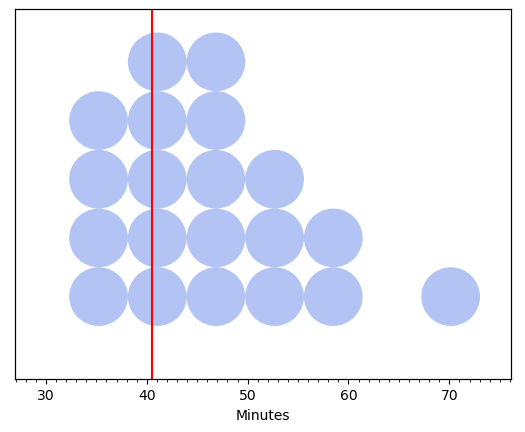

70


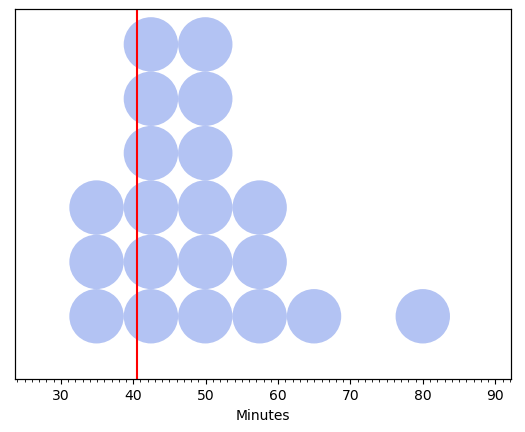

84A


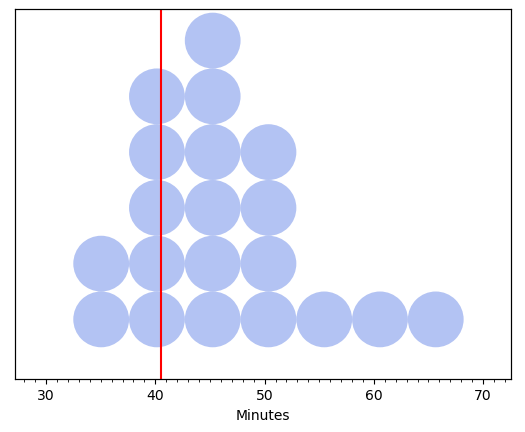

220


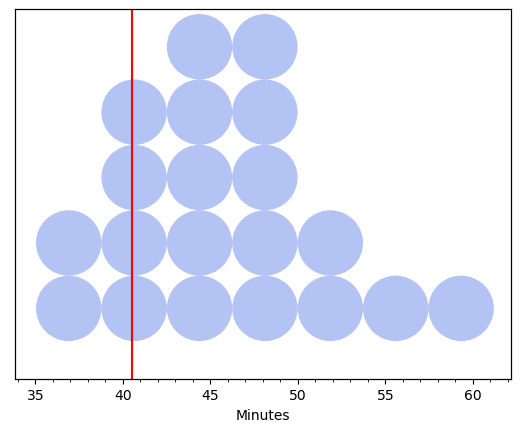

32X


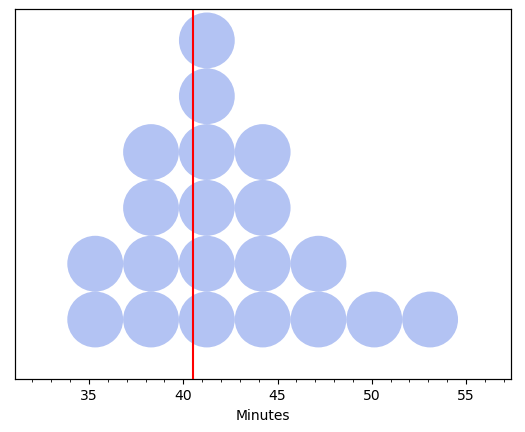

68A


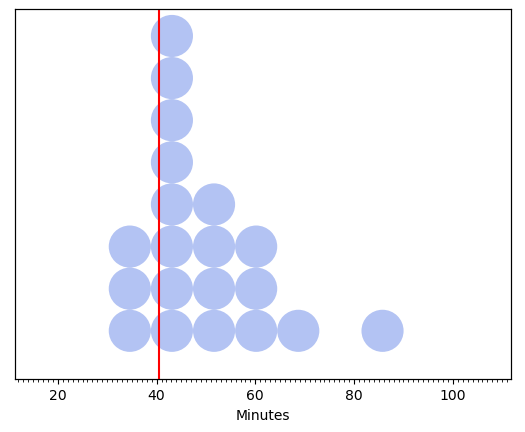

84X


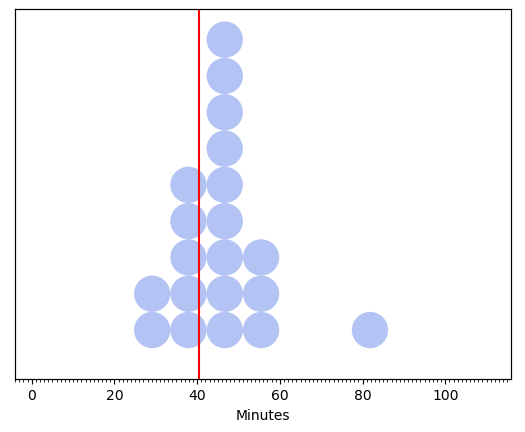

38


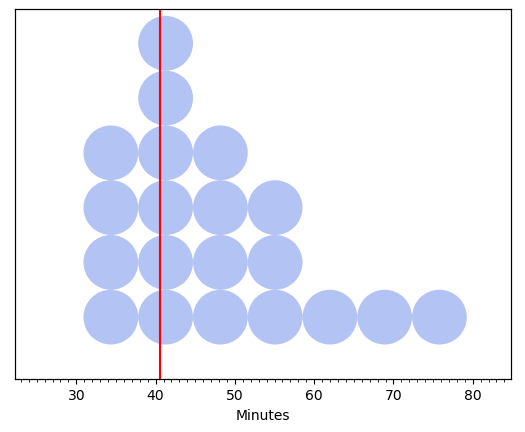

102


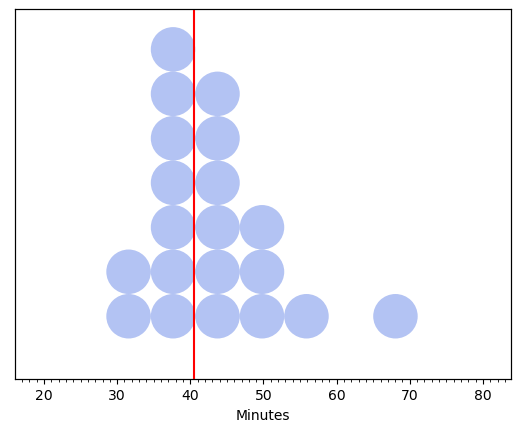

270


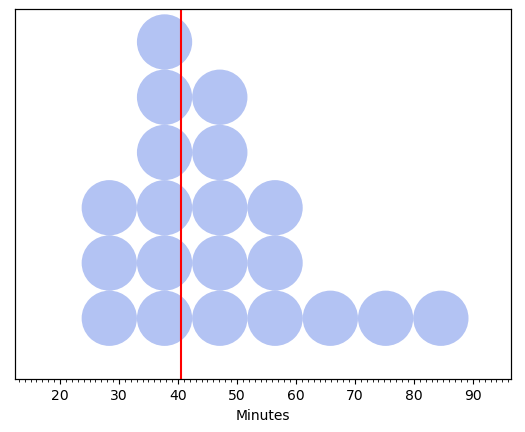

51X


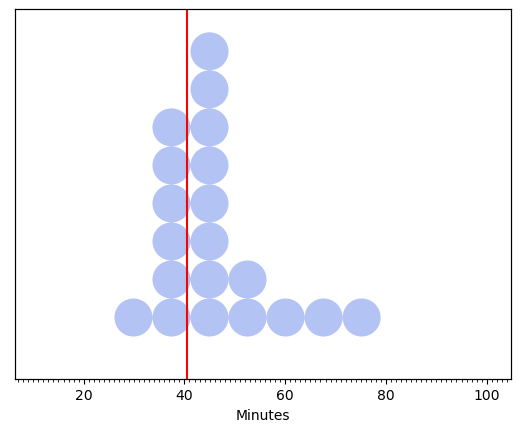

33X


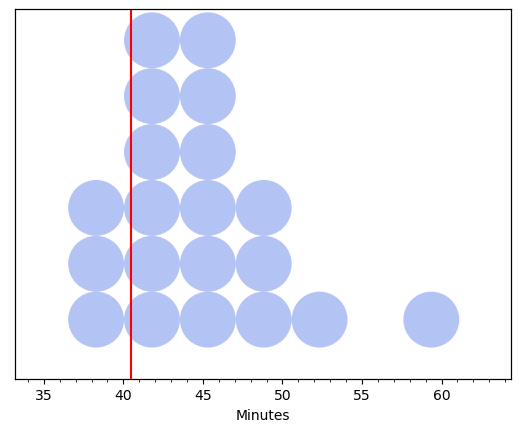

75


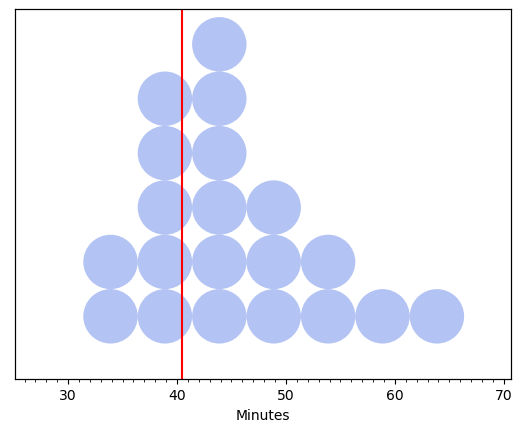

26


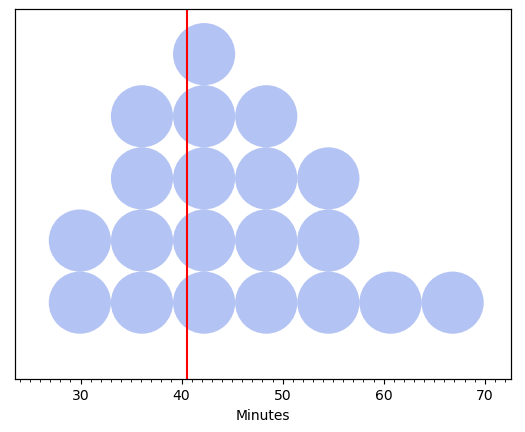

66A


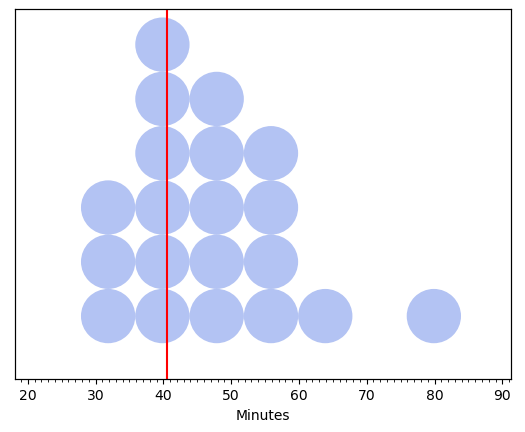

31A


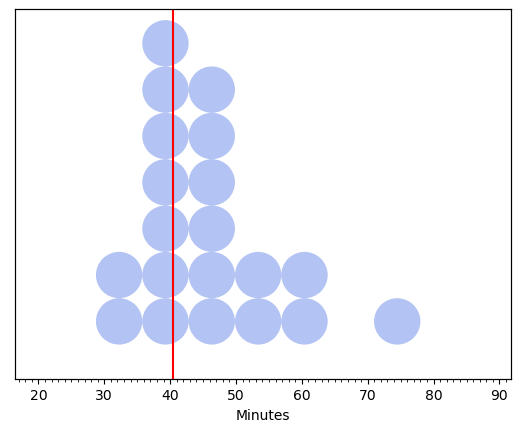

49


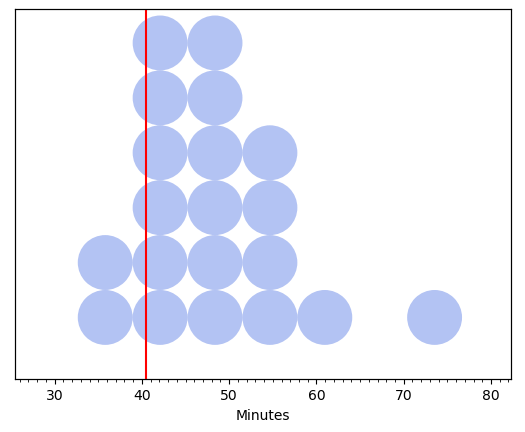

111


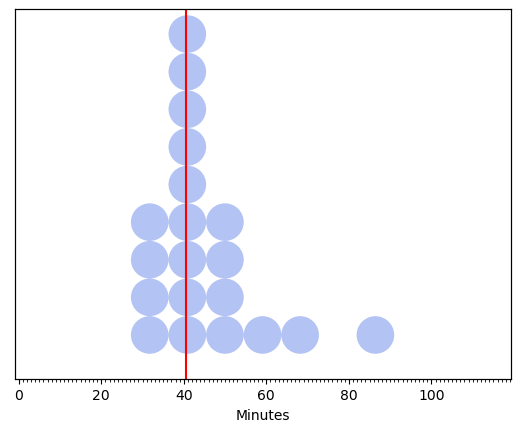

18


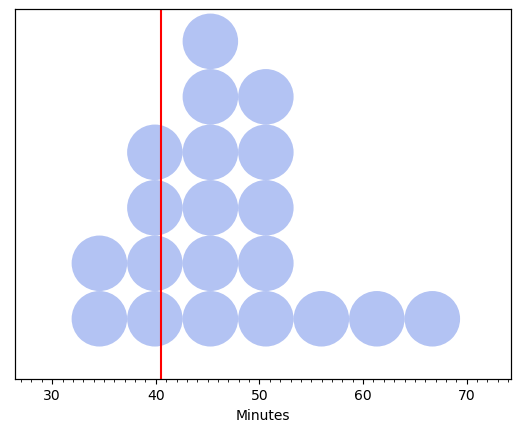

11


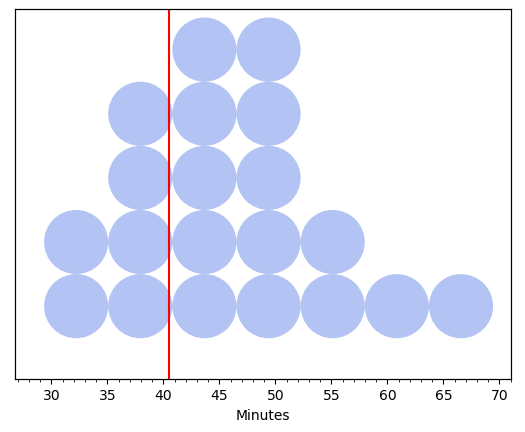

14C


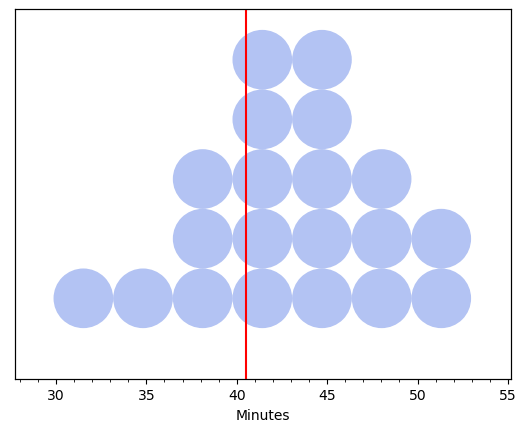

114


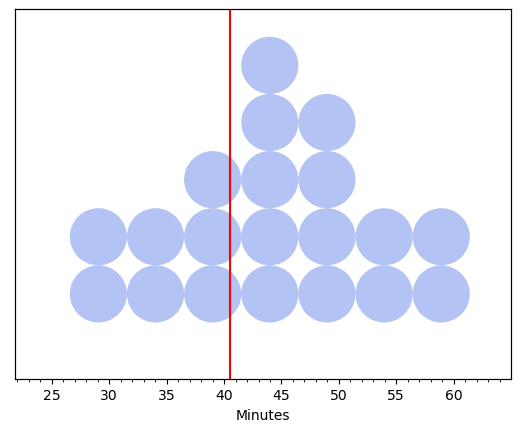

76A


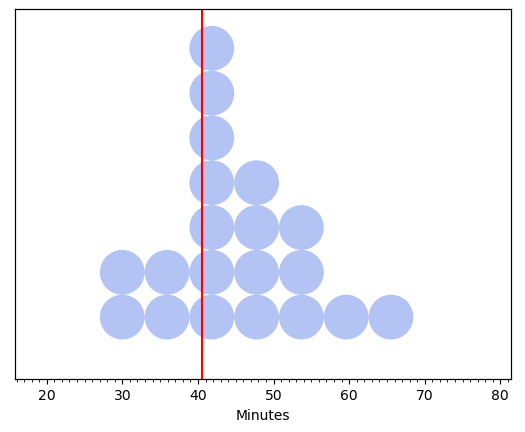

44B


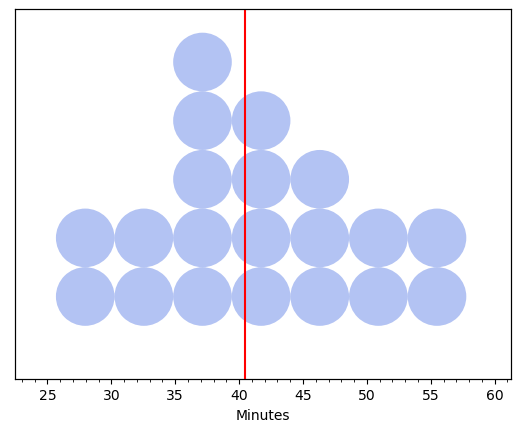

7A


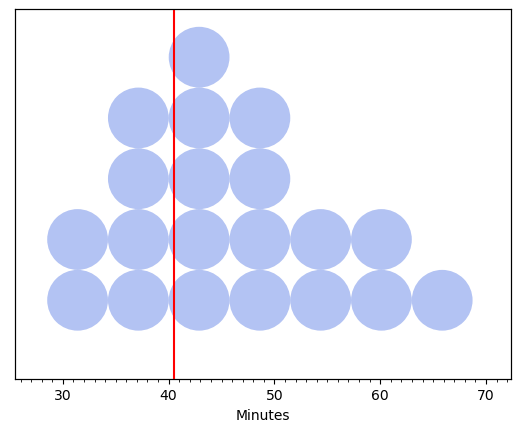

43


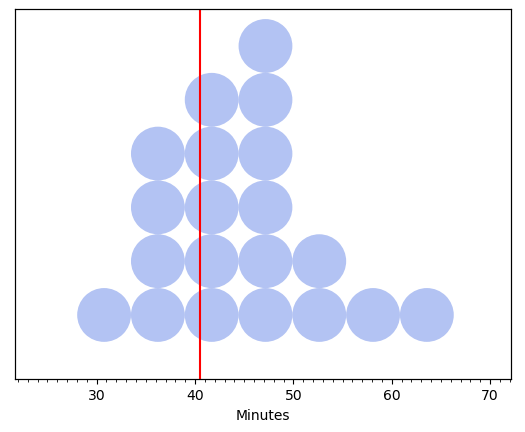

25


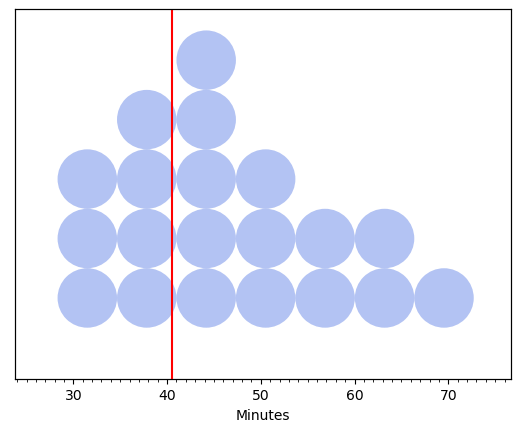

104


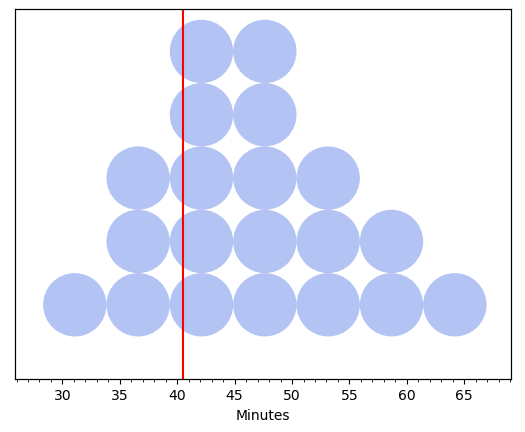

33A


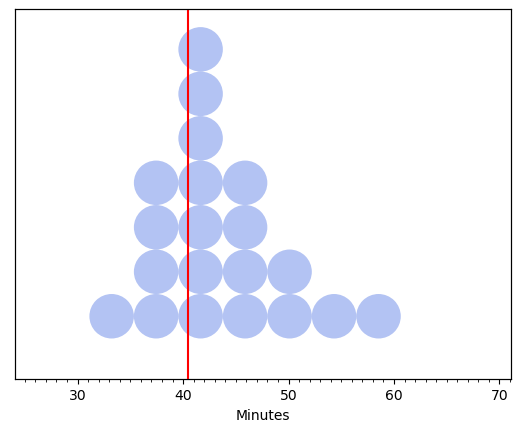

16C


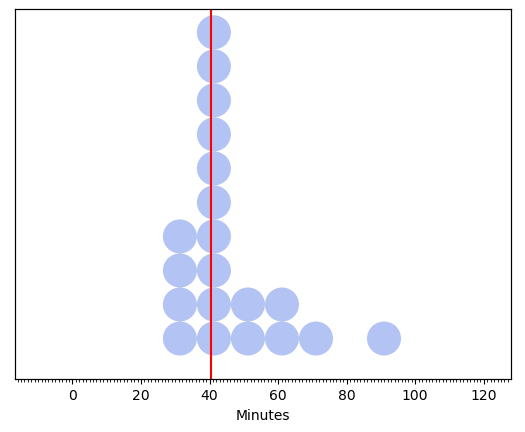

42D


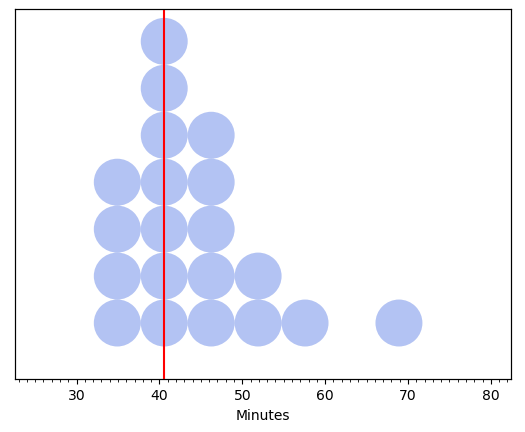

31B


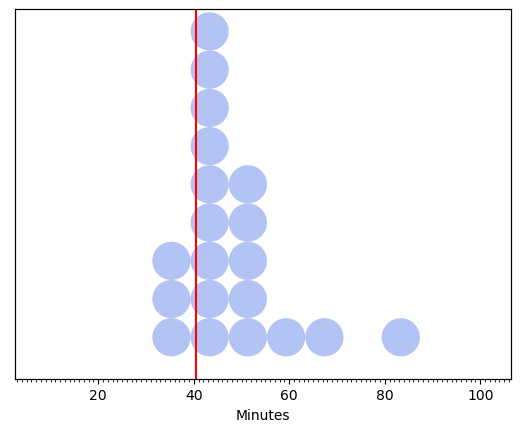

66X


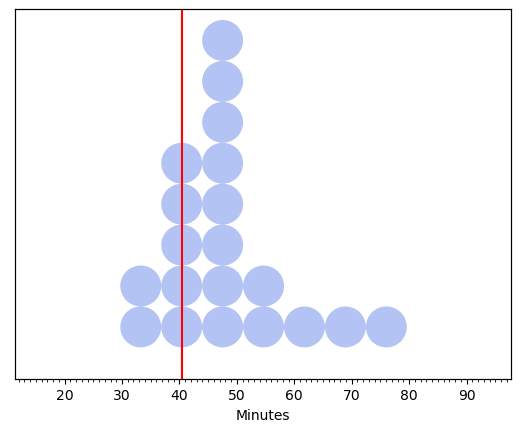

31D


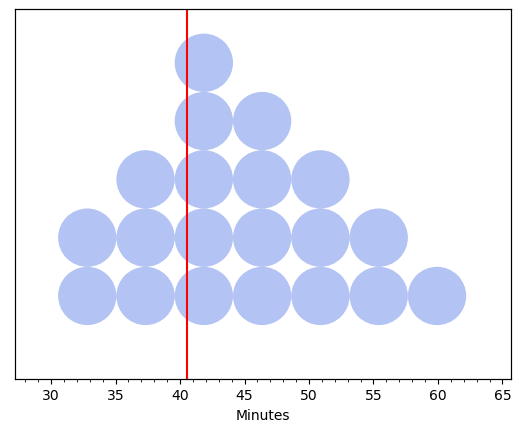

33D


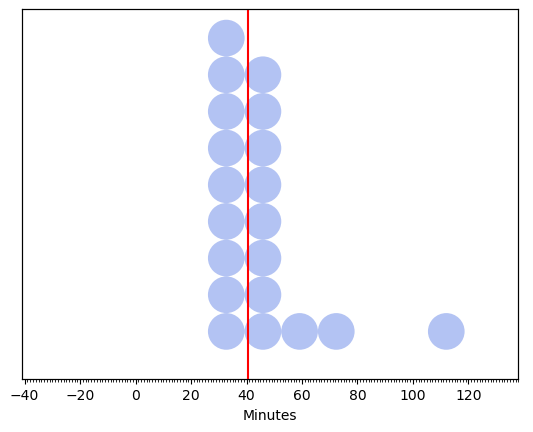

39X


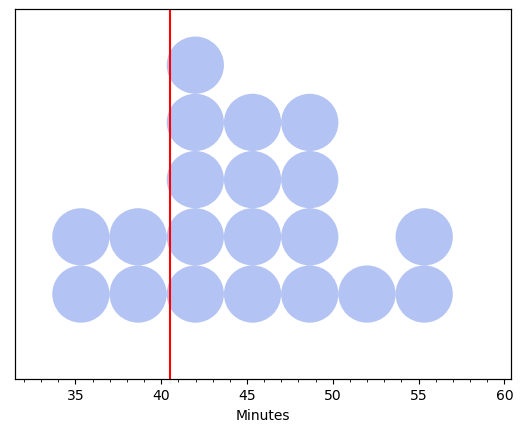

41B


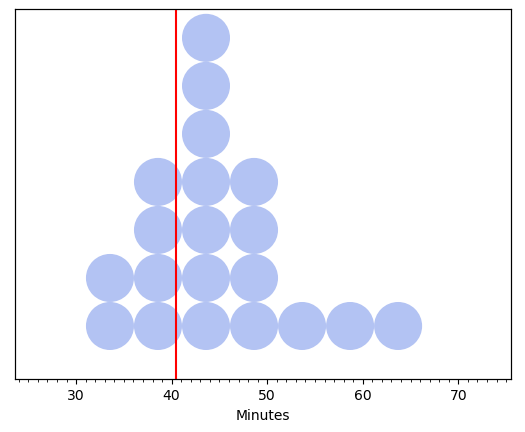

25B


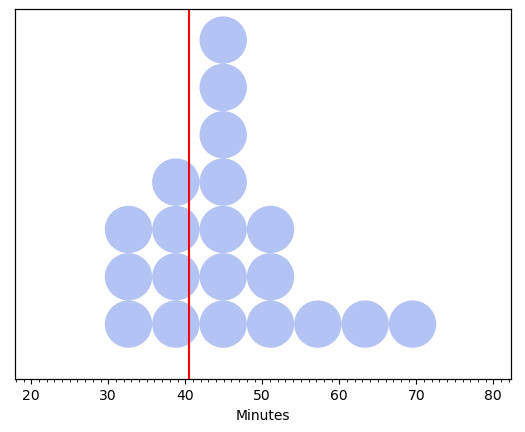

7D


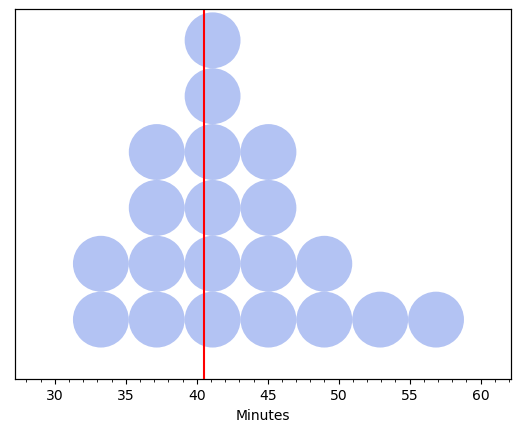

46E


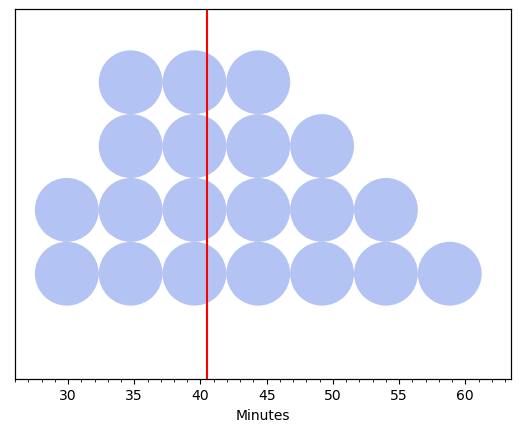

118


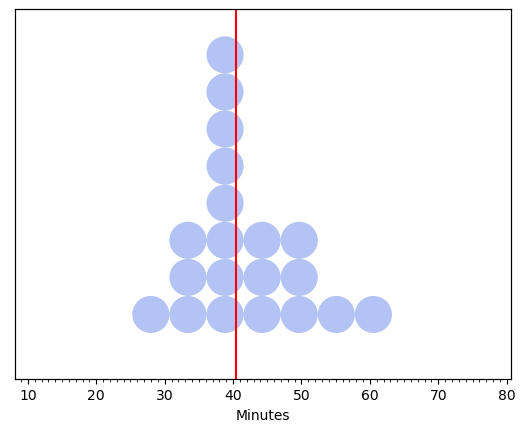

51D


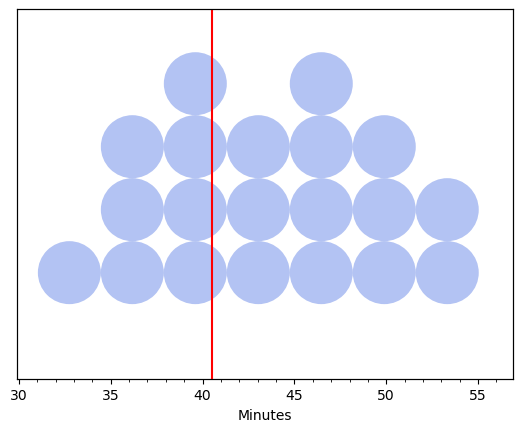

15D


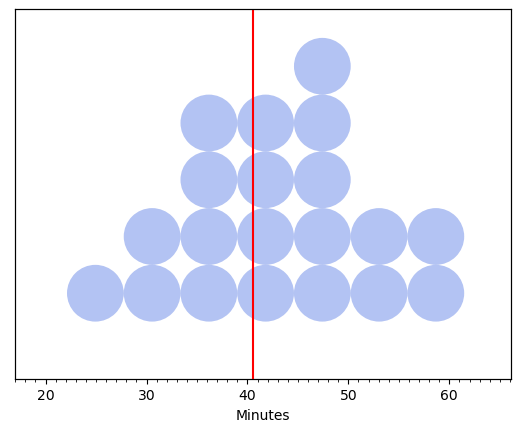

41A


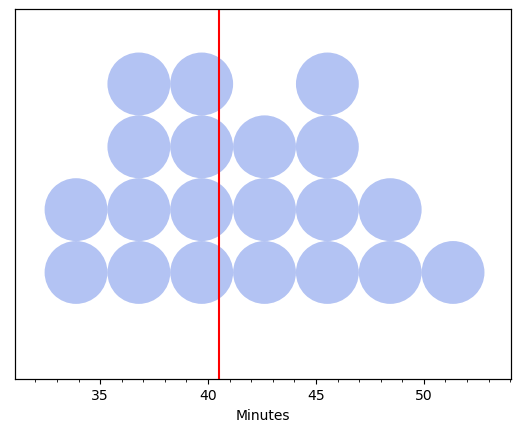

25D


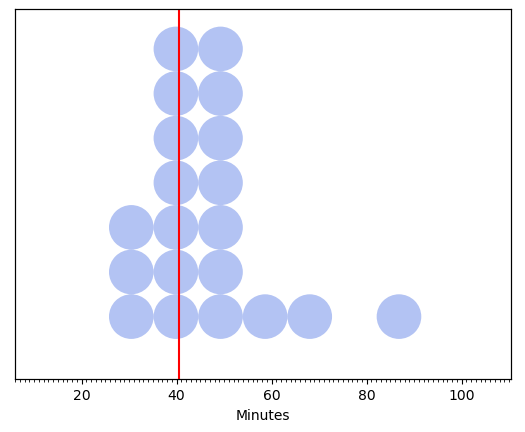

38D


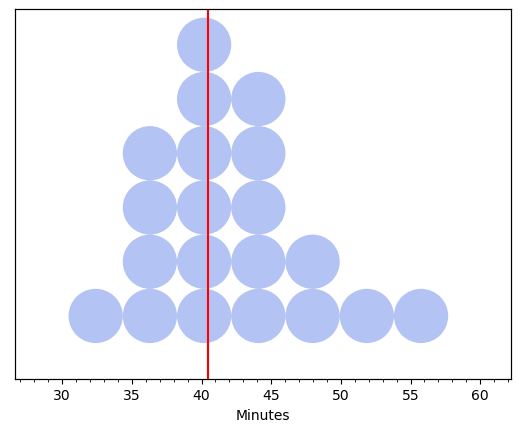

40B


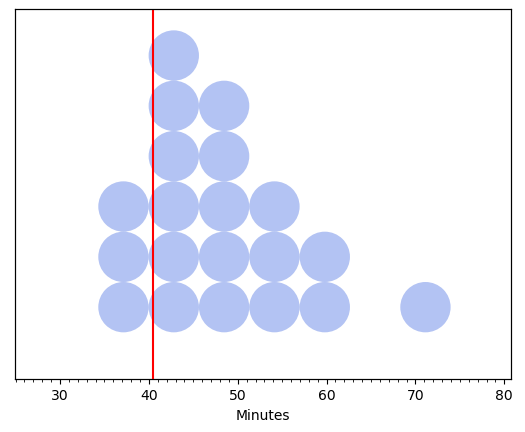

66B


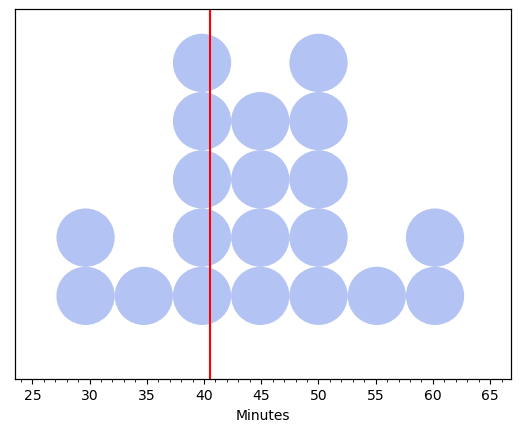

38B


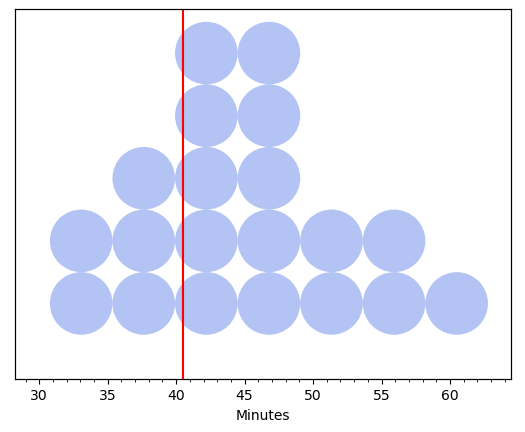

236


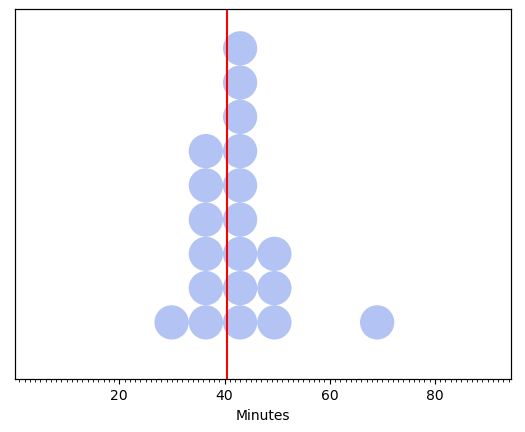

7B


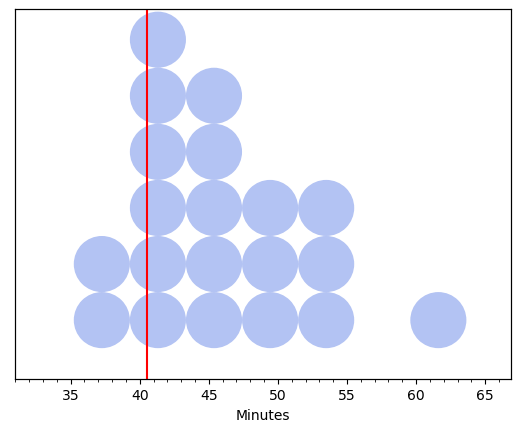

41X


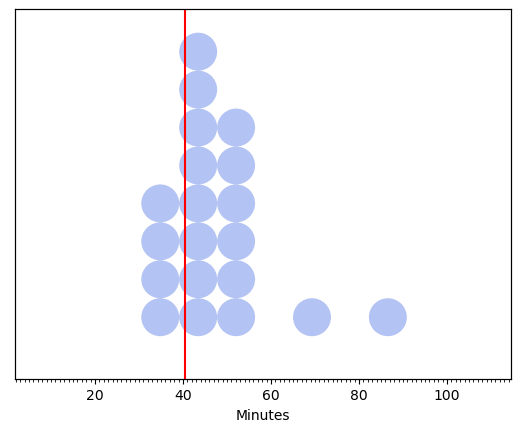

40E


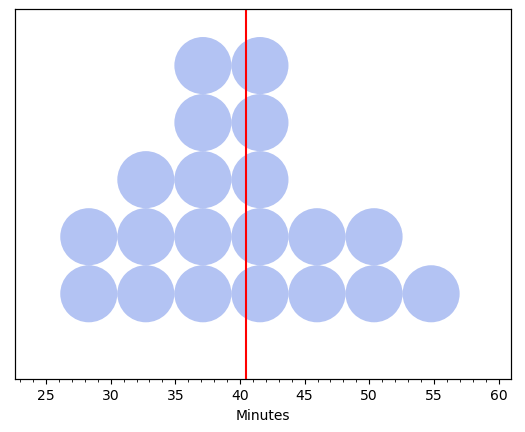

161


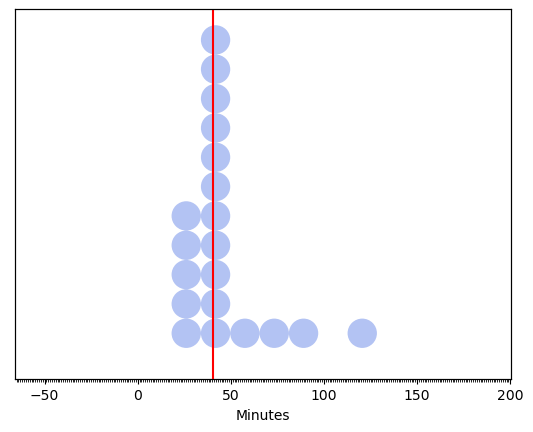

70D


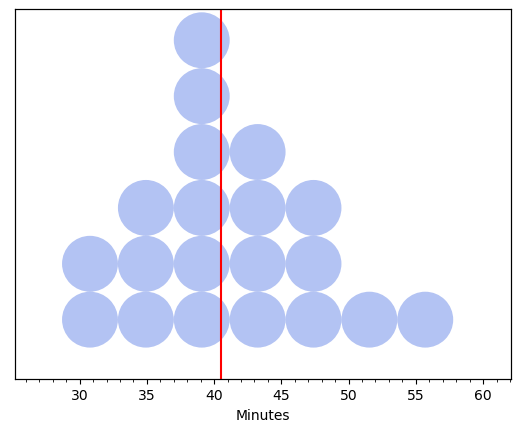

69X


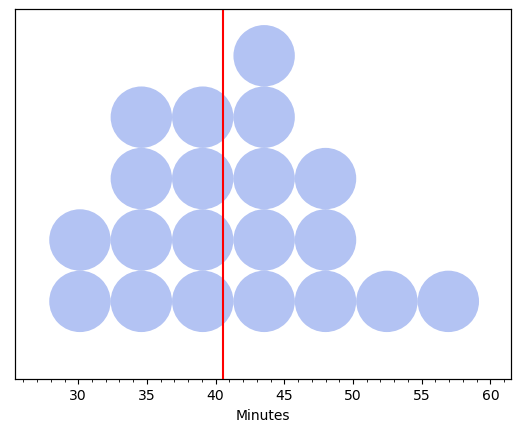

116


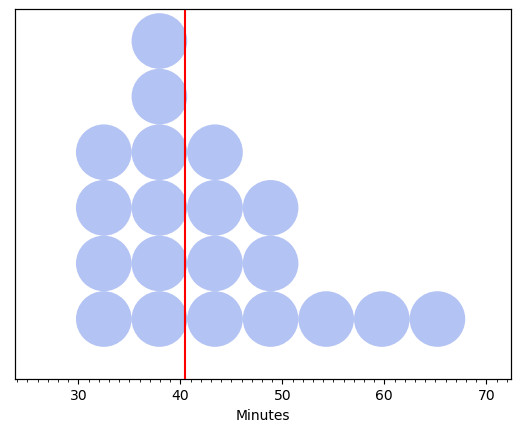

77X


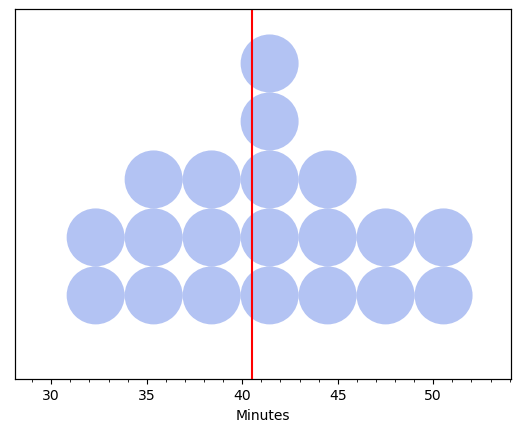

25X


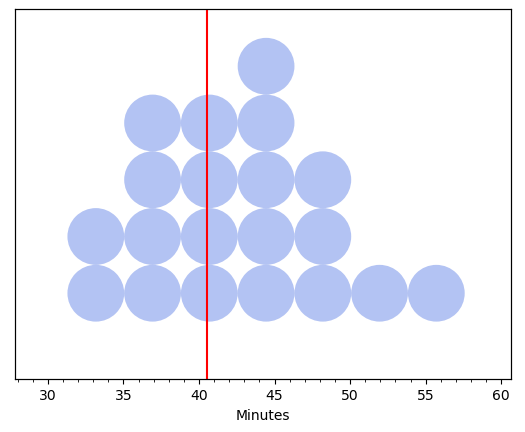

68X


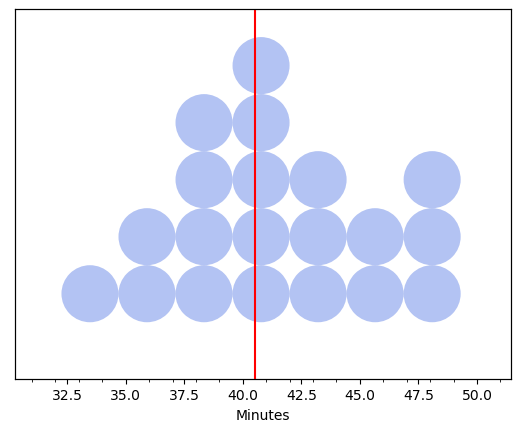

16D


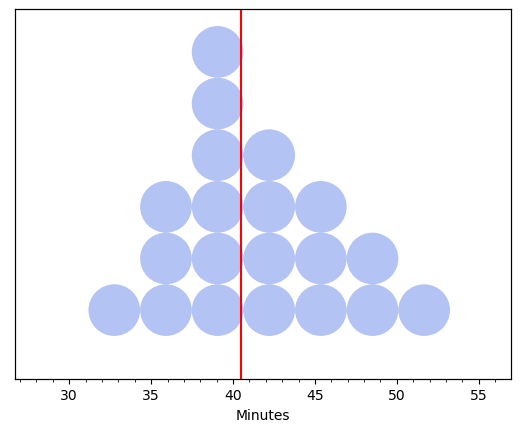

33E


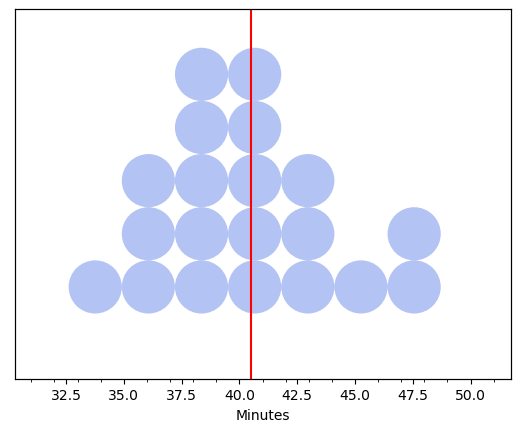

41D


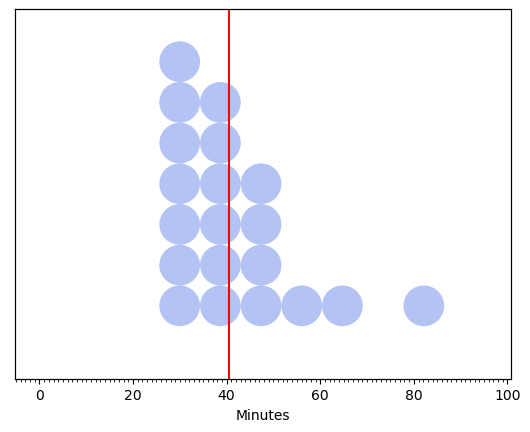

In [191]:
# plotting qdp for each line id
for lineid in linelist:
    linedist = pd.read_csv("knn_dist_csvs/knn_dist_{}".format(lineid), header=None)
    print(lineid)
    quantile_dotplot(lineid, linedist[0].to_list(), 40.5)

In [134]:
quantile_dotplot(act_pred_knn['DIFF_DIV_ACT'].to_list(), 35.2)

TypeError: quantile_dotplot() missing 1 required positional argument: 'pred'

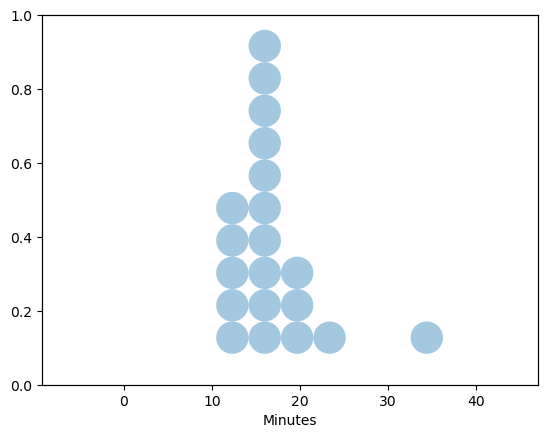

In [59]:
quantile_dotplot(act_pred_knn['DIFF_DIV_ACT'].to_list(), 15.5)

In [67]:
# loading in dist for route 27
dist27 = pd.read_csv("knn_dist_csvs/knn_dist_27", header=None)

In [61]:
dist27[0].to_list()

[0.2326967862133208,
 0.1617246596066565,
 0.0913146333220682,
 0.2170509708737864,
 0.0992508240934971,
 0.2821785001425721,
 0.1827180310326377,
 0.2533461261693451,
 0.3411297852474322,
 0.2226654578422483,
 0.2248919619706137,
 0.3418554938007695,
 0.2218524681087077,
 0.4024782494068021,
 0.3031019202363367,
 0.2269715352309846,
 0.8833333333333334,
 0.756135770234987,
 0.9505938242280286,
 0.7535864978902954,
 0.5448275862068966,
 0.5861148197596796,
 0.5005793742757821,
 0.348,
 1.2049382716049382,
 0.2948387096774192,
 0.1192133131618758,
 0.362686567164179,
 0.2911266201395812,
 0.4468435498627631,
 0.0,
 0.0861313868613139,
 0.282172373081464,
 0.332368315239244,
 0.0905126694166175,
 0.2688493203139958,
 0.1293689950662165,
 0.2983017474772336,
 0.0619277662755923,
 0.2934679579641459,
 0.1132405566600398,
 0.280281007751938,
 0.174222043766312,
 -0.0019662921348315,
 -0.0527721061724517,
 -0.0900877478063047,
 0.3957877000842459,
 0.2387984075280493,
 0.1092907801418439,
 0

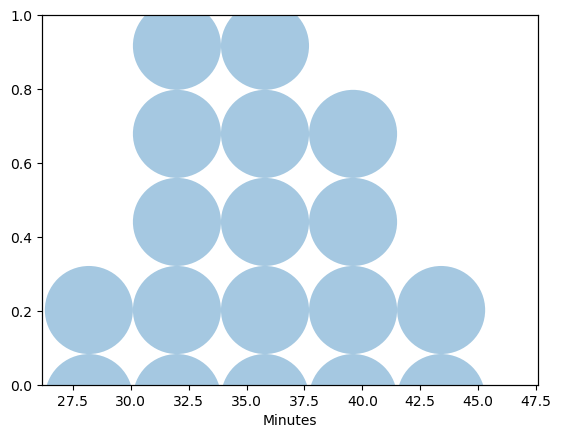

In [83]:
quantile_dotplot(dist27[0].to_list(), 35.2)

In [68]:
# loading in dist for route 118
dist118 = pd.read_csv("knn_dist_csvs/knn_dist_118", header=None)

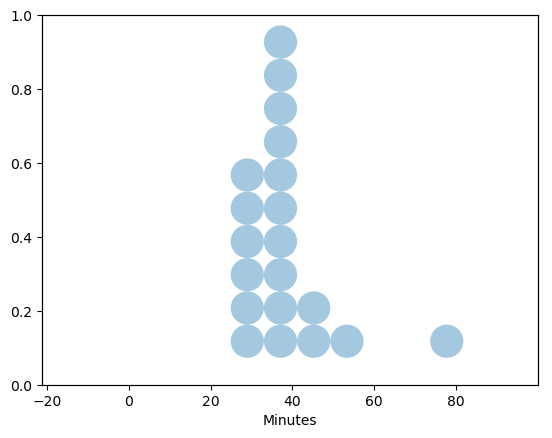

In [82]:
quantile_dotplot(dist118[0].to_list(), 35.2)

In [45]:
linelist[0]

'68'

## All Code Together

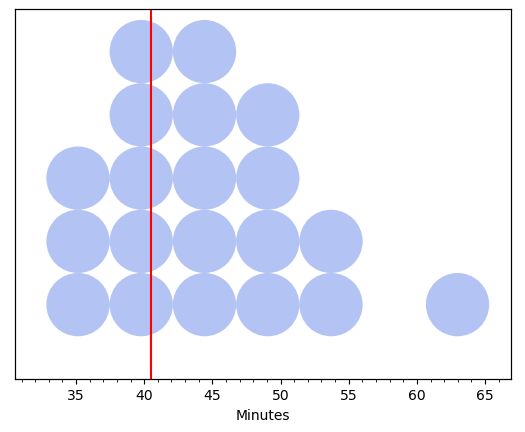

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from statistics import variance
from scipy.stats import lognorm


# code adapted from https://gist.github.com/tupui/c8dd181fd1e732584bbd7109b96177e3

# function to plot quantile dot plot given the normalised data and model prediction
def quantile_dotplot(lineid, normdata, pred):
    
    sample = 20
    p_less_than_x = np.linspace(1 / sample / 2, 1 - (1 / sample / 2), sample)
    
    preddata = []
    for i in normdata:
        preddata += [i*pred + pred]
        
    stdev = variance(preddata)**0.5
    sum = 0
    for j in preddata:
        sum += j
    mean = sum / len(preddata)
    
    # probability density function
    pdf = lognorm.pdf
    
    x2 = np.percentile(preddata, p_less_than_x * 100)  # Inverce CDF (ppf)

    # Create bins
    n_bins = 7
    hist = np.histogram(x2, bins=n_bins)
    bins, edges = hist
    radius = (edges[1] - edges[0]) / 2

    fig, ax = plt.subplots()
    ax.set_xlabel('Minutes')

    # Dotplot
    ax2 = ax.twinx()
    patches = []
    max_y = 0
    max_len = 0
    for i in range(n_bins):
        x_bin = (edges[i + 1] + edges[i]) / 2
        y_bins = [(i + 1) * (radius * 2) for i in range(bins[i])]
    
        # if y_bins is empty, continue
        if not y_bins:
            continue
            
        if len(y_bins) > max_len:
            max_len = len(y_bins)

        max_y = max(y_bins) if max(y_bins) > max_y else max_y

        for _, y_bin in enumerate(y_bins):
            circle = Circle((x_bin, y_bin), radius)
            patches.append(circle)
            
    
    p = PatchCollection(patches, alpha=0.4)
    p.set_facecolor('royalblue')
    ax2.add_collection(p)
    
    scale_dict = {
        '68':1.6,
        '45A':1.4,
        '25A':1.5,
        '14':1.7,
        '77A':1.25,
        '39':1.4,
        '16':1.2,
        '40D':1.2,
        '27B':1.35,
        '142':1.1,
        '83':1.3,
        '130':1,
        '15':1.6,
        '46A':1.3,
        '33':1.4,
        '7':1.5,
        '39A':1.5,
        '1':1.3,
        '41':1.2,
        '67X':1.1,
        '59':1.3,
        '9':1.5,
        '40':1.6,
        '239':1.6,
        '84':1.1,
        '53':1.1,
        '185':0.7,
        '151':1.3,
        '13':1.35,
        '15B':1.3,
        '65B':1.1,
        '29A':1.6,
        '61':1,
        '140':7.2,
        '123':1.3,
        '79A':1,
        '38A':1.5,
        '31':1,
        '69':1.35,
        '44':1.6,
        '42':2.2,
        '67':1.3,
        '184':1.4,
        '238':1,
        '145':1.45,
        '17A':1.6,
        '32':1.5,
        '27A':1.3,
        '17':1.4,
        '27X':1.5,
        '122':1.45,
        '54A':1.3,
        '66':1.6,
        '150':1.2,
        '56A':1.3,
        '37':1.5,
        '27':1.6,
        '15A':1,
        '65':1.3,
        '47':1.6,
        '76':1.45,
        '79':1.15,
        '83A':1.4,
        '63':1.5,
        '33B':0.9,
        '4':1.35,
        '120':1.6,
        '41C':1.45,
        '70':1.2,
        '84A':1.5,
        '220':1.45,
        '32X':1.45,
        '68A':1,
        '84X':0.7,
        '38':1.35,
        '102':1.6,
        '270':1.4,
        '51X':1,
        '33X':1.6,
        '75':1.35,
        '26':1.5,
        '66A':1.3,
        '31A':1,
        '49':1.2,
        '111':0.8,
        '18':1.3,
        '11':1.5,
        '14C':1.4,
        '114':1.4,
        '76A':1.1,
        '44B':1.5,
        '7A':1.6,
        '43':1.3,
        '25':1.6,
        '104':1.6,
        '33A':1.1,
        '16C':1.3,
        '42D':1.1,
        '31B':0.8,
        '66X':1,
        '31D':1.6,
        '33D':1.6,
        '39X':1.7,
        '41B':1.45,
        '25B':1.2,
        '7D':1.4,
        '46E':1.6,
        '118':0.8,
        '51D':1.8,
        '15D':1.4,
        '41A':1.6,
        '25D':1.1,
        '38D':1.2,
        '40B':1.6,
        '66B':1.4,
        '38B':1.6,
        '236':0.7,
        '7B':1.45,
        '41X':0.8,
        '40E':1.4,
        '161':1,
        '70D':1.4,
        '69X':1.6,
        '116':1.6,
        '77X':1.6,
        '25X':1.6,
        '68X':1.5,
        '16D':1.4,
        '33E':1.5,
        '41D':2.3
    }
    
    scale = scale_dict[lineid]
   # scale = 1.6

    shift_dict = {
        '68':0.08,
        '45A':-0.1,
        '25A':-0.02,
        '14':0.06,
        '77A':-0.15,
        '39':0.05,
        '16':-0.15,
        '40D':-0.2,
        '27B':-0.1,
        '142':-0.22,
        '83':-0.05,
        '130':-0.35,
        '15':0,
        '46A':-0.05,
        '33':0.02,
        '7':0.02,
        '39A':0.02,
        '1':-0.2,
        '41':-0.1,
        '67X':-0.3,
        '59':-0.17,
        '9':0,
        '40':0,
        '239':0.05,
        '84':-0.15,
        '53':-0.12,
        '185':-0.45,
        '151':-0.07,
        '13':-0.07,
        '15B':0,
        '65B':-0.1,
        '29A':0.02,
        '61':-0.11,
        '140':0.57,
        '123':-0.06,
        '79A':-0.2,
        '38A':0,
        '31':0,
        '69':0.03,
        '44':-0.02,
        '42':0.22,
        '67':0,
        '184':-0.1,
        '238':-0.23,
        '145':-0.02,
        '17A':0.1,
        '32':0,
        '27A':-0.1,
        '17':0,
        '27X':-0.1,
        '122':0,
        '54A':-0.13,
        '66':0.02,
        '150':0,
        '56A':0,
        '37':0.05,
        '27':0,
        '15A':0,
        '65':0,
        '47':0.03,
        '76':0.05,
        '79':-0.1,
        '83A':-0.2,
        '63':0,
        '33B':0,
        '4':-0.03,
        '120':0,
        '41C':0.03,
        '70':-0.03,
        '84A':0.01,
        '220':-0.04,
        '32X':-0.08,
        '68A':-0.16,
        '84X':-0.7,
        '38':0,
        '102':0.1,
        '270':0.05,
        '51X':-0.23,
        '33X':0.06,
        '75':-0.1,
        '26':0,
        '66A':0,
        '31A':-0.25,
        '49':-0.1,
        '111':-0.4,
        '18':-0.1,
        '11':0,
        '14C':-0.18,
        '114':-0.16,
        '76A':-0.27,
        '44B':-0.1,
        '7A':0.05,
        '43':-0.15,
        '25':0.07,
        '104':0,
        '33A':-0.25,
        '16C':0,
        '42D':-0.15,
        '31B':-0.6,
        '66X':-0.3,
        '31D':0,
        '33D':0,
        '39X':0.03,
        '41B':0,
        '25B':-0.15,
        '7D':-0.1,
        '46E':0,
        '118':-0.65,
        '51D':0.02,
        '15D':-0.18,
        '41A':-0.04,
        '25D':-0.07,
        '38D':-0.22,
        '40B':0.1,
        '66B':-0.13,
        '38B':0,
        '236':-0.8,
        '7B':-0.03,
        '41X':-0.5,
        '40E':-0.12,
        '161':0,
        '70D':-0.1,
        '69X':-0.02,
        '116':0.07,
        '77X':-0.07,
        '25X':-0.02,
        '68X':-0.12,
        '16D':-0.15,
        '33E':-0.1,
        '41D':0.25
    }
    
    shift = shift_dict[lineid]
    
    x1 = np.linspace((mean - 3*stdev) / scale + 0.45*pred + shift*pred, (mean + 3*stdev) / scale + 0.45*pred + shift*pred, 100)

    # Axis tweek
    # arguments for lognorm function
    args = {'s': 0.2, 'scale': 11.4}
    y_scale = (max_y + radius) / max(pdf(x1, **args))
    ticks_y = ticker.FuncFormatter(lambda x1, pos: '{0:g}'.format(x1 / y_scale))
    ax2.yaxis.set_major_formatter(ticks_y)
    ax2.set_yticklabels([])
    ax2.set_xlim([min(x1) - radius, max(x1) + radius])
    ax2.set_ylim([0, max_y + radius])
    ax2.set_aspect(1)
    
    # turn off y ticks
    plt.yticks([])
    ax.yaxis.set_major_locator(plt.NullLocator())
    
    # adding more x ticks
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
    
    # adding vertical line for the mean
    plt.axvline(x=pred, color='r')

    plt.show()
    
    
    
# testing the function (line 39A, prediction of 40.5)
lineid = "39A"
linedist = pd.read_csv("knn_dist_csvs/knn_dist_{}".format(lineid), header=None)
quantile_dotplot(lineid, linedist[0].to_list(), 40.5)